### exploratory graphs and such

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import sys
import matplotlib.pyplot as plt
%matplotlib inline
print sys.version
plt.style.use('fivethirtyeight')

2.7.11 |Anaconda 2.3.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [88]:
# 
df = pd.read_csv('../data/nUrve_wDistances_0329.csv')
#df = pd.read_csv('../data/nUrve_wLU_0421.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1058495 entries, 0 to 1058494
Data columns (total 33 columns):
ID                   1058495 non-null int64
GPS_DATETIMESTAMP    1058495 non-null object
GPS_LAT              1058495 non-null float64
GPS_LON              1058495 non-null float64
GPS_Speed            1058495 non-null float64
GPS_Alt              1058495 non-null float64
GPS_Sats             1058495 non-null float64
GPS_Fix              1058495 non-null float64
GPS_Quality          1058495 non-null float64
AMB_Temp             1058495 non-null float64
AMB_Humd             1058495 non-null float64
AMB_Lux              1058495 non-null float64
AMB_Snd              1058495 non-null float64
AMB_SndMin           1058495 non-null object
AMB_SndMax           1058494 non-null float64
AMB_SndMea           1058494 non-null float64
RDQ_AcX              1058494 non-null float64
RDQ_AcXMin           1058494 non-null float64
RDQ_AcXMax           1058494 non-null object
RDQ_AcXMea        

In [89]:
df['sensor'] = df.CCID_TEMP.apply(lambda x: x[:3])

In [95]:
df = df[~df.loc[:,('ID','GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 
                        'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 
                        'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 
                        'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 
          'RDQ_AcZMea', 'sensor')].duplicated()].loc[:,('ID','GPS_DATETIMESTAMP', 'GPS_LAT', 
                                                        'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 
                        'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 
                        'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 
                        'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 
          'RDQ_AcZMea', 'sensor')]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557308 entries, 0 to 1014834
Data columns (total 29 columns):
ID                   557308 non-null int64
GPS_DATETIMESTAMP    557308 non-null object
GPS_LAT              557308 non-null float64
GPS_LON              557308 non-null float64
GPS_Speed            557308 non-null float64
GPS_Alt              557308 non-null float64
GPS_Sats             557308 non-null float64
GPS_Fix              557308 non-null float64
GPS_Quality          557308 non-null float64
AMB_Temp             557308 non-null float64
AMB_Humd             557308 non-null float64
AMB_Lux              557308 non-null float64
AMB_Snd              557308 non-null float64
AMB_SndMin           557308 non-null object
AMB_SndMax           557307 non-null float64
AMB_SndMea           557307 non-null float64
RDQ_AcX              557307 non-null float64
RDQ_AcXMin           557307 non-null float64
RDQ_AcXMax           557307 non-null object
RDQ_AcXMea           557306 non-null f

In [98]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557306 entries, 0 to 1014834
Data columns (total 29 columns):
ID                   557306 non-null int64
GPS_DATETIMESTAMP    557306 non-null object
GPS_LAT              557306 non-null float64
GPS_LON              557306 non-null float64
GPS_Speed            557306 non-null float64
GPS_Alt              557306 non-null float64
GPS_Sats             557306 non-null float64
GPS_Fix              557306 non-null float64
GPS_Quality          557306 non-null float64
AMB_Temp             557306 non-null float64
AMB_Humd             557306 non-null float64
AMB_Lux              557306 non-null float64
AMB_Snd              557306 non-null float64
AMB_SndMin           557306 non-null object
AMB_SndMax           557306 non-null float64
AMB_SndMea           557306 non-null float64
RDQ_AcX              557306 non-null float64
RDQ_AcXMin           557306 non-null float64
RDQ_AcXMax           557306 non-null object
RDQ_AcXMea           557306 non-null f

In [107]:
print 'total records %s' % len(df)
print 'unique time-lat-lon %s' % len(df.groupby(['GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON'])['ID'].count())
print 'unique lat-lon %s' % len(df.groupby(['GPS_LAT', 'GPS_LON'])['ID'].count())

total records 557306
unique time-lat-lon 376111
unique lat-lon 152033


In [100]:
#df.to_csv('../data/nurve-master-0422.csv', index=False, index_label=False)

In [284]:
### read in fresh and set merge key based on index
df = pd.read_csv('../data/nurve-landuse-0423.csv')
df['merge_key'] = df.index

In [285]:
df.sensor.value_counts()

9     51839
8     46899
6     34306
7     31859
10    27999
5     24356
3     14876
4     13771
0     12704
2      5149
1      3180
Name: sensor, dtype: int64

In [286]:
print df.columns.tolist()

['Unnamed: 0', 'ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'merge_key']


In [288]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

ID    GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
0  29309  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
1  29311  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
2  29313  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
3  29315  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
4  29317  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   

   GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp    ...      RDQ_AcZMax  \
0       8.0      1.0         10.0      8.80    ...         10.3166   
1       8.0      1.0         10.0      8.79    ...         10.1205   
2       8.0      1.0         10.0      8.80    ...          9.9636   
3       8.0      1.0         10.0      8.79    ...         10.3558   
4       8.0      1.0         10.0      8.79    ...          9.9636   

   RDQ_AcZMea  sensor                timestamp  hourOfDay  minuteOfDay  \
0      8.6840       0  2015-10-26 00:00:36.000          0            0   
1      8.8177       0  2015-10-26 00:00:36.000          0            0   
2      8.6248       0  2015-10-26 00:00:36.000          0            0   
3      8.8544       0  2015-10-26 00:00:36.000          0            0   
4      9.1034       0  2015-10-26 00:00:36.000          0            0   

   minuteStretched   LU05_DESC  LUCODE  merge_key  
0              0.0  Commercial    15.0          0  
1              0.0  Commercial    15.0          1  
2              0.0  Commercial    15.0          2  
3              0.0  Commercial    15.0          3  
4              0.0  Commercial    15.0          4  

[5 rows x 36 columns]

In [289]:
# extract some time values to explore
df['timestamp'] = pd.to_datetime(df.GPS_DATETIMESTAMP)

# timetuple() method returns (YYYY, MM, DD, H, M, S, Weekday (0=Monday), DayOfYear, IsDaylightSavings)
df['hourOfDay'] = df.timestamp.apply(lambda x: x.timetuple()[3])
df['day'] = df.timestamp.apply(lambda x: x.timetuple()[2])
df['minuteOfDay'] = df.timestamp.apply(lambda x: x.timetuple()[3]*100 + x.timetuple()[4])
df['minuteStretched'] = df.timestamp.apply(lambda x: x.timetuple()[3]*100 + np.floor(x.timetuple()[4]*100./60))

In [290]:
df.head()

ID    GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
0  29309  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
1  29311  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
2  29313  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
3  29315  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
4  29317  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   

   GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp ...   RDQ_AcZMea  sensor  \
0       8.0      1.0         10.0      8.80 ...       8.6840       0   
1       8.0      1.0         10.0      8.79 ...       8.8177       0   
2       8.0      1.0         10.0      8.80 ...       8.6248       0   
3       8.0      1.0         10.0      8.79 ...       8.8544       0   
4       8.0      1.0         10.0      8.79 ...       9.1034       0   

            timestamp  hourOfDay  minuteOfDay  minuteStretched   LU05_DESC  \
0 2015-10-26 00:00:36          0            0              0.0  Commercial   
1 2015-10-26 00:00:36          0            0              0.0  Commercial   
2 2015-10-26 00:00:36          0            0              0.0  Commercial   
3 2015-10-26 00:00:36          0            0              0.0  Commercial   
4 2015-10-26 00:00:36          0            0              0.0  Commercial   

   LUCODE  merge_key  day  
0    15.0          0   26  
1    15.0          1   26  
2    15.0          2   26  
3    15.0          3   26  
4    15.0          4   26  

[5 rows x 37 columns]

In [111]:
# try subset without time/space, mean values where available
X_names = ['AMB_Lux', 'AMB_SndMea', 'RDQ_AcXMea', 'RDQ_AcYMea', 'RDQ_AcZMea', 'GPS_Speed']
X_vals = df.loc[:, X_names].values

In [282]:
# first what are overal stats
df.loc[:, X_names].describe().T.loc[:,('min', '25%', '50%', '75%', 'max')]

min         25%          50%          75%           max
AMB_Lux    -9998.000000  123.000000  1631.000000  4097.000000  34413.000000
AMB_SndMea   118.570000  508.730000   509.770000   511.040000    980.860000
AMB_SndMax   135.000000  533.000000   553.000000   614.000000   1023.000000
GPS_Speed      0.000000    0.010000     0.080000     5.690000     58.610000
GPS_LAT       42.223632   42.290088    42.332965    42.351123     42.382534
GPS_LON      -71.180953  -71.084951   -71.068077   -71.059043    -71.024444
hourOfDay      0.000000   12.000000    15.000000    17.000000     23.000000

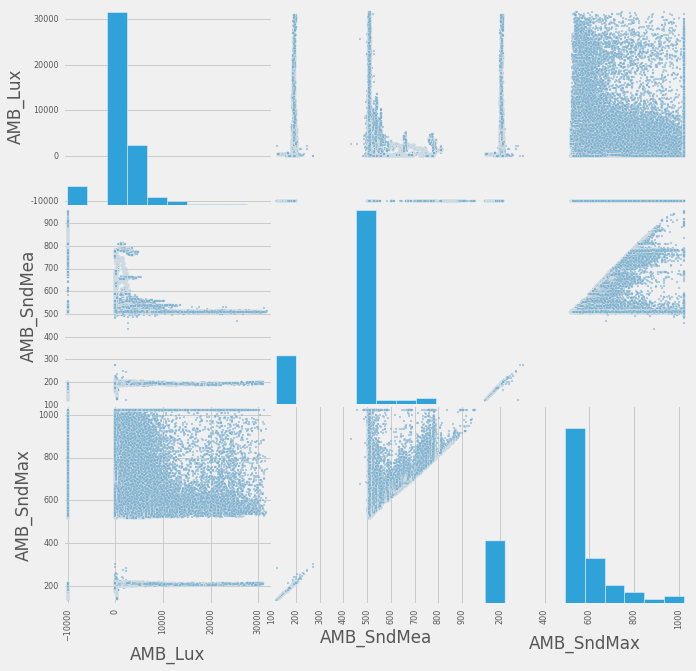

In [382]:
# pd.tools.plotting.scatter_matrix(df.loc[:, X_names])
pd.tools.plotting.scatter_matrix(df.loc[:, X_names[:3]], figsize=(10,10));

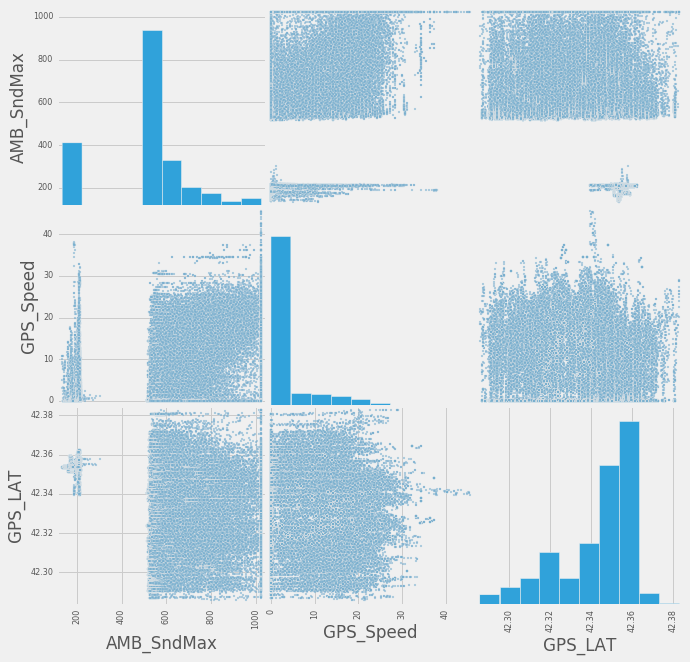

In [383]:
pd.tools.plotting.scatter_matrix(df.loc[:, X_names[2:5]], figsize=(10,10));

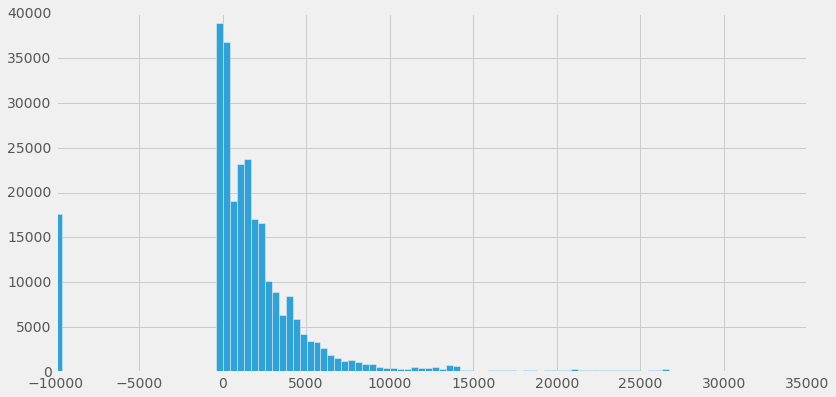

In [384]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_Lux, bins=100);

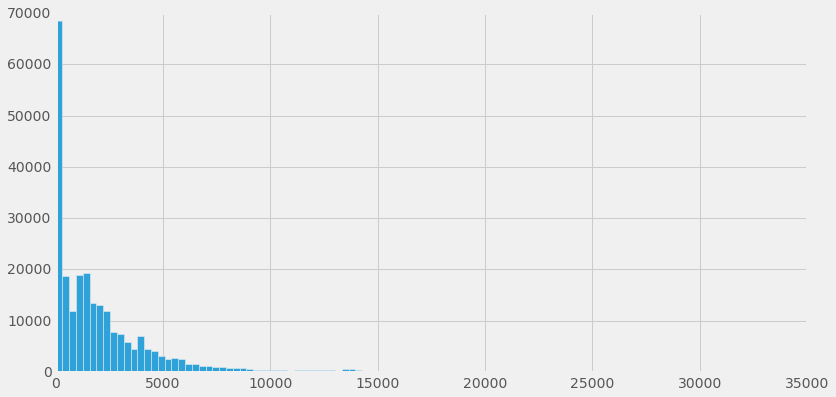

In [385]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_Lux[df.AMB_Lux>0], bins=100);

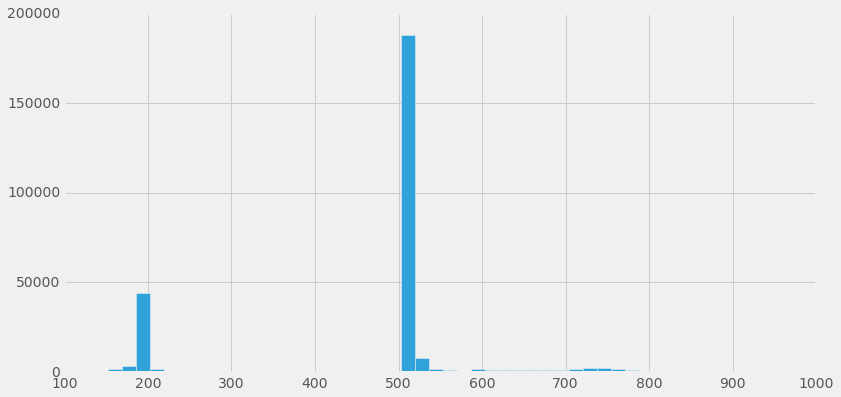

In [386]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_SndMea[~df.AMB_SndMea.isnull()], bins=50);

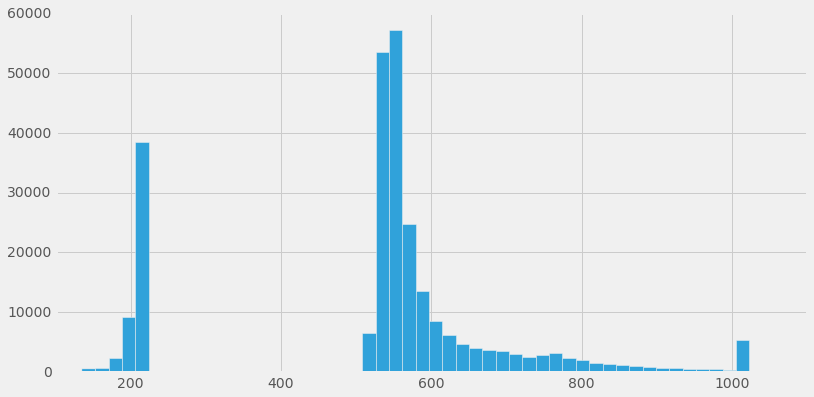

In [387]:
plt.figure(figsize=(12,6))
plt.hist(df.AMB_SndMax[~df.AMB_SndMax.isnull()], bins=50);

In [ ]:
pd.tools.plotting.scatter_matrix(df.loc[:, ('RDQ_AcXMax', 'RDQ_AcYMax', 'RDQ_AcZMax')], figsize=(12,10));

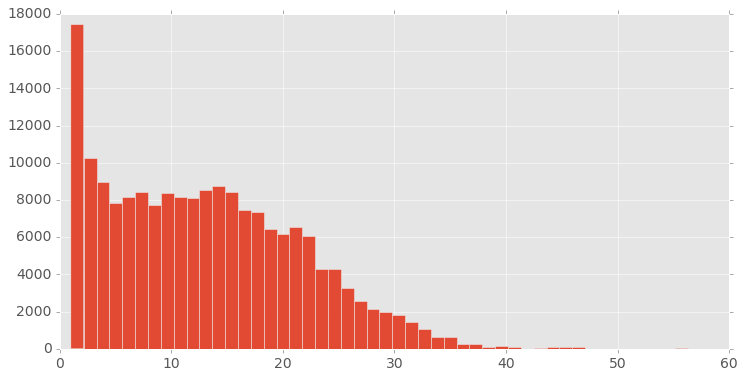

In [283]:
# df['RDQ_AcXMax2'] = df.RDQ_AcXMax.astype(float) # hmmm error returns: "0.          aX�YGYG"
plt.figure(figsize=(12,6))
plt.hist(df.GPS_Speed[df.GPS_Speed>1], bins=50);

### get land use codes

In [125]:
import pandas as pd
import numpy as np
import geopandas as gp
from shapely.geometry import Point
from geopandas import GeoDataFrame
from geopandas.tools import sjoin

In [126]:
LU2005 = gp.read_file('../data/Land Use 2005/Land Use 2005/GISDATA_LANDUSE2005_POLY.shp')

def shapeMerge(points, polygons):
    points['geometry'] = points.apply(lambda x: Point(x.GPS_LON, x.GPS_LAT), axis =1)
    points = GeoDataFrame(points,crs = {'init': 'epsg:4326'})
    polygons = GeoDataFrame(polygons,crs = {'init': 'epsg:4326'})
    #polygons.crs = points.crs
    s_join = sjoin(points, polygons, how='left', op='within')
    return s_join

joined = shapeMerge(df, LU2005)

joined.head()

ID    GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
0  29281  2015-10-26 0:0:15.0  42.338428 -71.084632      17.28      7.6   
1  29283  2015-10-26 0:0:15.0  42.338428 -71.084632      17.28      7.6   
2  29285  2015-10-26 0:0:15.0  42.338428 -71.084632      17.28      7.6   
3  29287  2015-10-26 0:0:15.0  42.338428 -71.084632      17.28      7.6   
4  29289  2015-10-26 0:0:15.0  42.338428 -71.084632      17.28      7.6   

   GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp   ...    RDQ_AcZMea  sensor  \
0       8.0      1.0         10.0      8.79   ...        8.7180     000   
1       8.0      1.0         10.0      8.79   ...        8.9303     000   
2       8.0      1.0         10.0      8.79   ...        8.6768     000   
3       8.0      1.0         10.0      8.80   ...        8.8541     000   
4       8.0      1.0         10.0      8.79   ...        8.6844     000   

            timestamp hourOfDay  minuteOfDay  minuteStretched  \
0 2015-10-26 00:00:15         0            0              0.0   
1 2015-10-26 00:00:15         0            0              0.0   
2 2015-10-26 00:00:15         0            0              0.0   
3 2015-10-26 00:00:15         0            0              0.0   
4 2015-10-26 00:00:15         0            0              0.0   

                       geometry  index_right                 LU05_DESC  LUCODE  
0  POINT (-71.084632 42.338428)       4385.0  Participation Recreation     7.0  
1  POINT (-71.084632 42.338428)       4385.0  Participation Recreation     7.0  
2  POINT (-71.084632 42.338428)       4385.0  Participation Recreation     7.0  
3  POINT (-71.084632 42.338428)       4385.0  Participation Recreation     7.0  
4  POINT (-71.084632 42.338428)       4385.0  Participation Recreation     7.0  

[5 rows x 37 columns]

In [127]:
print ', '.join(joined.columns.tolist())

ID, GPS_DATETIMESTAMP, GPS_LAT, GPS_LON, GPS_Speed, GPS_Alt, GPS_Sats, GPS_Fix, GPS_Quality, AMB_Temp, AMB_Humd, AMB_Lux, AMB_Snd, AMB_SndMin, AMB_SndMax, AMB_SndMea, RDQ_AcX, RDQ_AcXMin, RDQ_AcXMax, RDQ_AcXMea, RDQ_AcY, RDQ_AcYMin, RDQ_AcYMax, RDQ_AcYMea, RDQ_AcZ, RDQ_AcZMin, RDQ_AcZMax, RDQ_AcZMea, sensor, timestamp, hourOfDay, minuteOfDay, minuteStretched, geometry, index_right, LU05_DESC, LUCODE


In [123]:
float(len(df.GPS_Speed[df.GPS_Speed>1]))#/len(df.GPS_Speed)

184550.0

### recalculate speed estimated from points?

In [121]:
# speed calculated from lat/lon observations
idx = (df.RawDistKM>0) & (df.TimeDiff>0) & (~df.TimeDiff.isnull()) & (~df.RawDistKM.isnull())

AttributeError: 'DataFrame' object has no attribute 'RawDistKM'

In [12]:
# using dataframes / series were crashing my kernel for some reason... no idea why
dist = df.RawDistKM[idx].values
tim = df.TimeDiff[idx].values

In [29]:
# speed in KPH
calc_speed = (dist / tim)*3600
len(calc_speed)

328392

(0, 100)

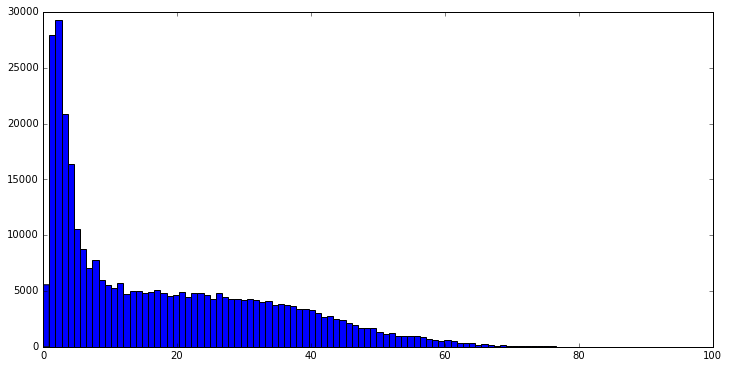

In [27]:
plt.figure(figsize=(12,6))
plt.hist(calc_speed, bins=1000);
plt.xlim(0,100)

In [128]:
print joined.columns.tolist()

['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'geometry', 'index_right', u'LU05_DESC', u'LUCODE']


In [130]:
print ', '.join(X_names)

AMB_Lux, AMB_SndMea, RDQ_AcXMea, RDQ_AcYMea, RDQ_AcZMea, GPS_Speed


In [132]:
# cut down to just the 4 types we want
comm = joined[joined.LU05_DESC =='Commercial']
mfr = joined[joined.LU05_DESC=='Multi-Family Residential']
indus = joined[joined.LU05_DESC=='Industrial']
hdr = joined[joined.LU05_DESC=='High Density Residential']

my_list = [comm, mfr, indus, hdr]
data = pd.DataFrame()

for i in my_list:
    data = data.append(i)
    
print data.LU05_DESC.unique()
print ''
data.head()

[u'Commercial' u'Multi-Family Residential' u'Industrial'
 u'High Density Residential']



ID    GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
15  29309  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
16  29311  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
17  29313  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
18  29315  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
19  29317  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   

    GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp   ...    RDQ_AcZMea  sensor  \
15       8.0      1.0         10.0      8.80   ...        8.6840     000   
16       8.0      1.0         10.0      8.79   ...        8.8177     000   
17       8.0      1.0         10.0      8.80   ...        8.6248     000   
18       8.0      1.0         10.0      8.79   ...        8.8544     000   
19       8.0      1.0         10.0      8.79   ...        9.1034     000   

             timestamp hourOfDay  minuteOfDay  minuteStretched  \
15 2015-10-26 00:00:36         0            0              0.0   
16 2015-10-26 00:00:36         0            0              0.0   
17 2015-10-26 00:00:36         0            0              0.0   
18 2015-10-26 00:00:36         0            0              0.0   
19 2015-10-26 00:00:36         0            0              0.0   

                        geometry  index_right   LU05_DESC  LUCODE  
15  POINT (-71.085525 42.337547)       1679.0  Commercial    15.0  
16  POINT (-71.085525 42.337547)       1679.0  Commercial    15.0  
17  POINT (-71.085525 42.337547)       1679.0  Commercial    15.0  
18  POINT (-71.085525 42.337547)       1679.0  Commercial    15.0  
19  POINT (-71.085525 42.337547)       1679.0  Commercial    15.0  

[5 rows x 37 columns]

In [133]:
df = data.drop(['geometry', 'index_right'], axis=1)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 266938 entries, 15 to 1013897
Data columns (total 35 columns):
ID                   266938 non-null int64
GPS_DATETIMESTAMP    266938 non-null object
GPS_LAT              266938 non-null float64
GPS_LON              266938 non-null float64
GPS_Speed            266938 non-null float64
GPS_Alt              266938 non-null float64
GPS_Sats             266938 non-null float64
GPS_Fix              266938 non-null float64
GPS_Quality          266938 non-null float64
AMB_Temp             266938 non-null float64
AMB_Humd             266938 non-null float64
AMB_Lux              266938 non-null float64
AMB_Snd              266938 non-null float64
AMB_SndMin           266938 non-null object
AMB_SndMax           266938 non-null float64
AMB_SndMea           266938 non-null float64
RDQ_AcX              266938 non-null float64
RDQ_AcXMin           266938 non-null float64
RDQ_AcXMax           266938 non-null object
RDQ_AcXMea           266938 n

In [291]:
df.groupby('LU05_DESC')[X_names].agg(['min', 'median', 'max']).T

LU05_DESC            Commercial  High Density Residential    Industrial  \
AMB_Lux    min     -9998.000000              -9998.000000  -9998.000000   
           median   1215.000000               1665.500000   2365.000000   
           max     31608.000000              31181.000000  31014.000000   
AMB_SndMea min       118.570000                173.210000    167.610000   
           median    509.520000                510.060000    509.210000   
           max       955.010000                889.160000    919.430000   
AMB_SndMax min       135.000000                189.000000    180.000000   
           median    547.000000                572.000000    561.000000   
           max      1023.000000               1023.000000   1023.000000   
GPS_Speed  min         0.000000                  0.000000      0.000000   
           median      0.180000                  1.390000      0.230000   
           max        45.570000                 42.000000     42.500000   
GPS_LAT    min        42.311717                 42.312484     42.312709   
           median     42.354003                 42.324031     42.342384   
           max        42.381305                 42.380752     42.379940   
GPS_LON    min       -71.112236                -71.114105    -71.109962   
           median    -71.060760                -71.066909    -71.058937   
           max       -71.025611                -71.026252    -71.025367   
hourOfDay  min         0.000000                  0.000000      0.000000   
           median     16.000000                 14.000000     17.000000   
           max        23.000000                 23.000000     23.000000   

LU05_DESC          Multi-Family Residential  
AMB_Lux    min                 -9998.000000  
           median               1287.000000  
           max                 31729.000000  
AMB_SndMea min                   171.000000  
           median                509.910000  
           max                   906.330000  
AMB_SndMax min                   187.000000  
           median                556.000000  
           max                  1023.000000  
GPS_Speed  min                     0.000000  
           median                  0.080000  
           max                    45.450000  
GPS_LAT    min                    42.285854  
           median                 42.321540  
           max                    42.382518  
GPS_LON    min                   -71.114128  
           median                -71.075851  
           max                   -71.027145  
hourOfDay  min                     0.000000  
           median                 14.000000  
           max                    23.000000

In [138]:
df.groupby('LU05_DESC')['AMB_Lux'].count()

LU05_DESC
Commercial                  183628
High Density Residential      5484
Industrial                   12630
Multi-Family Residential     65196
Name: AMB_Lux, dtype: int64

In [135]:
# df.to_csv('../data/nurve-landuse-0423.csv')

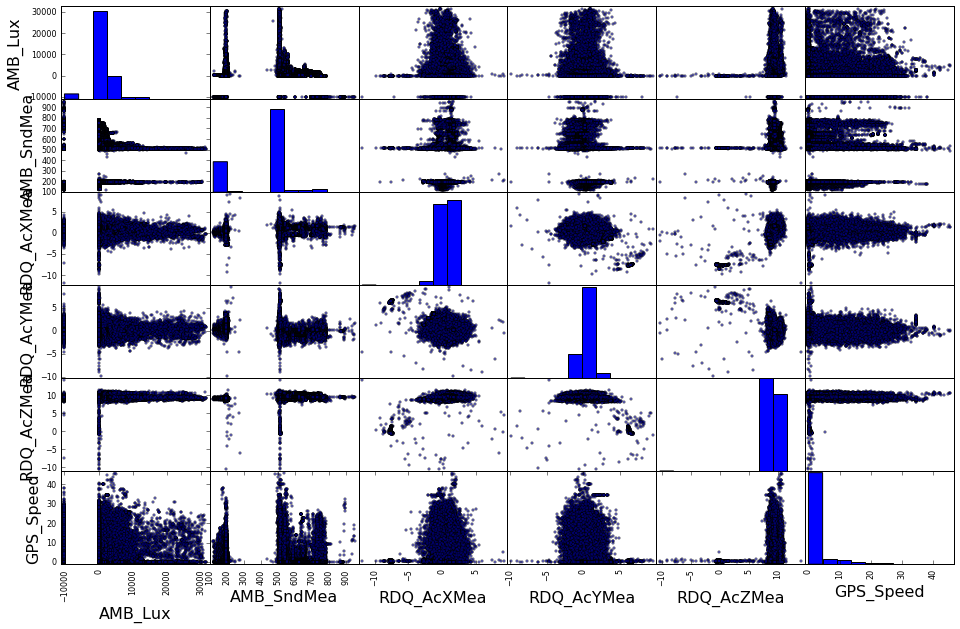

In [136]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='Commercial'].loc[:, X_names], figsize=(16,10));

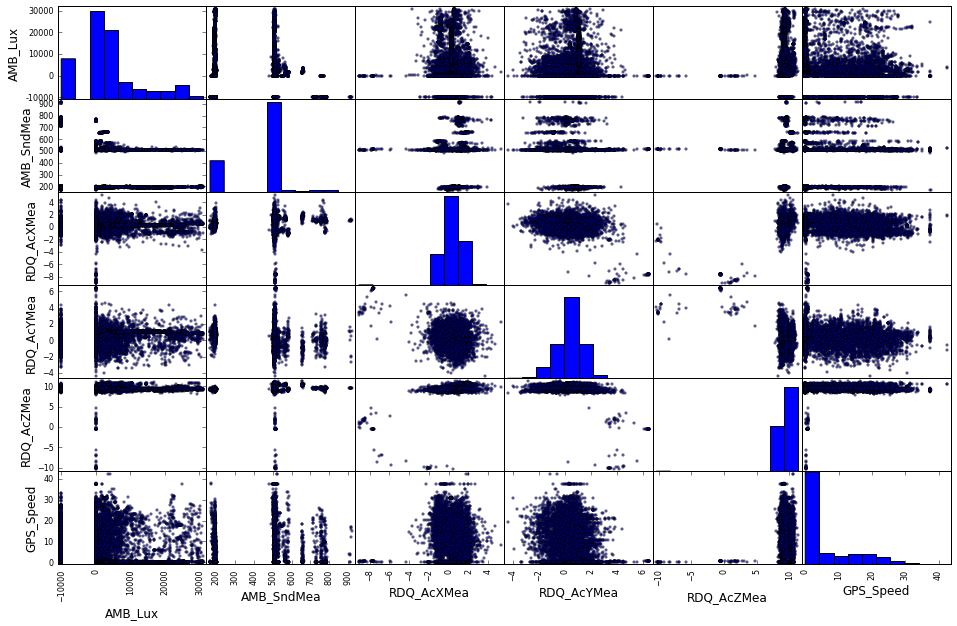

In [137]:
plt.rcParams.update({'font.size': 12})
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='Industrial'].loc[:, X_names], figsize=(16,10));

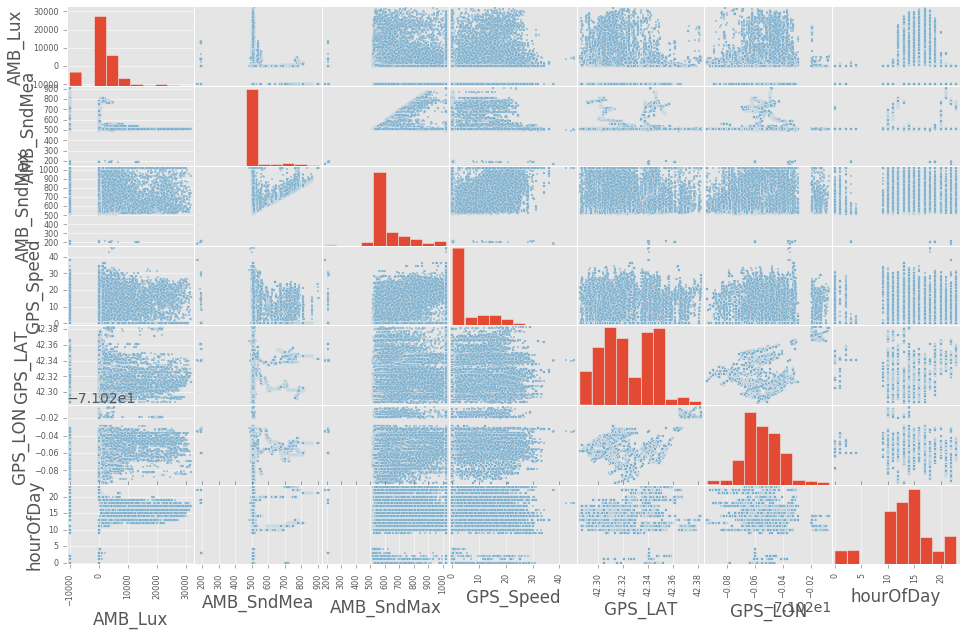

In [299]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='Multi-Family Residential'].loc[:, X_names], figsize=(16,10));

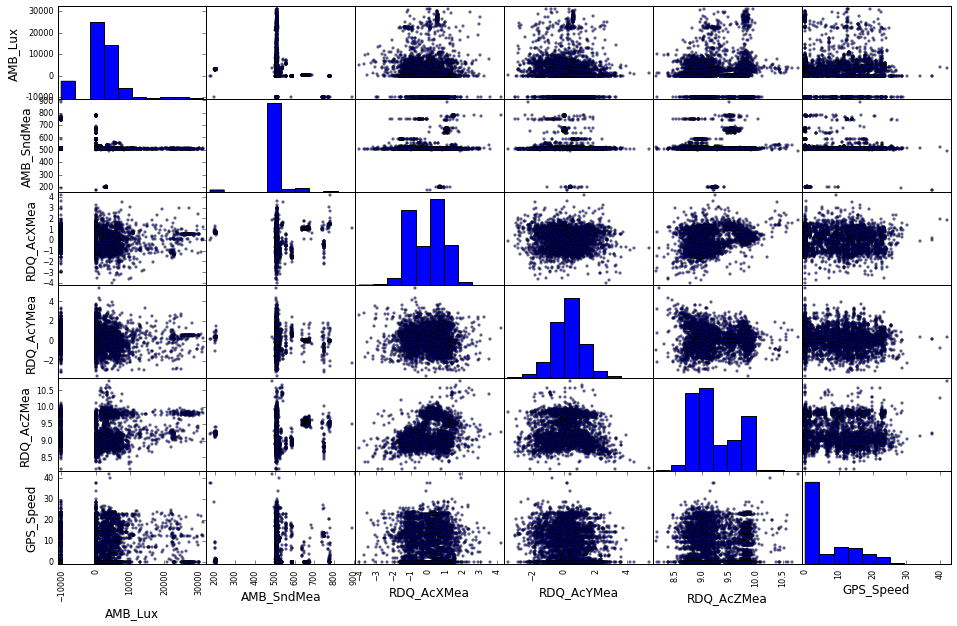

In [140]:
pd.tools.plotting.scatter_matrix(df[df.LU05_DESC=='High Density Residential'].loc[:, X_names], figsize=(16,10));

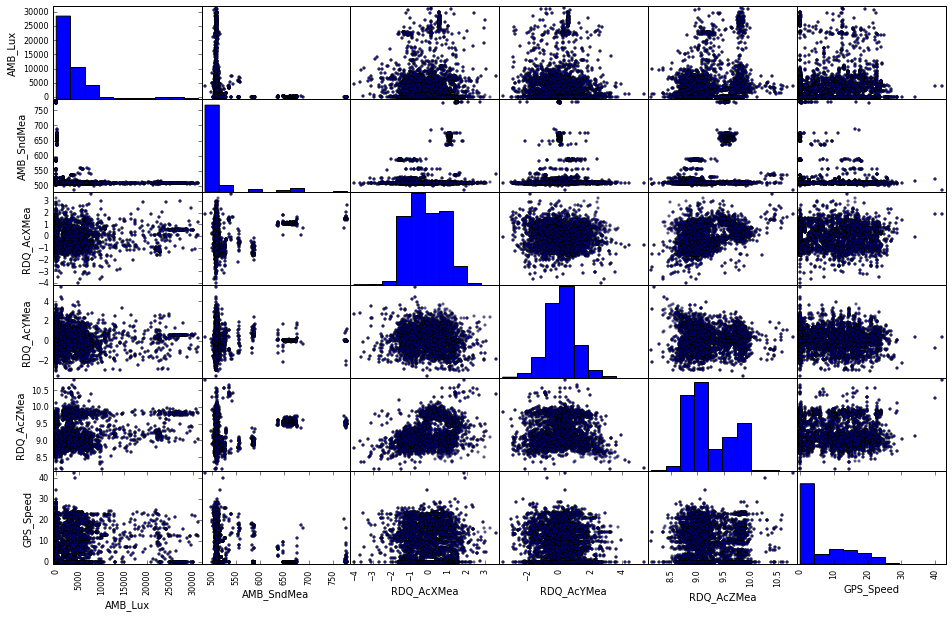

In [43]:
pd.tools.plotting.scatter_matrix(df[(df.LU05_DESC=='High Density Residential') & 
                                    (df.AMB_Lux>0) & (df.AMB_SndMea>400)].
                                 loc[:, X_names], figsize=(16,10));

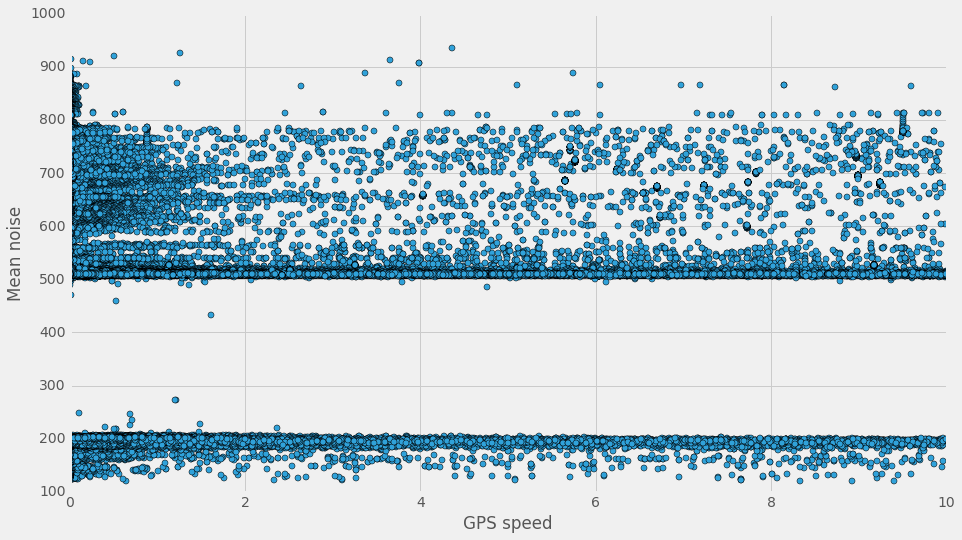

In [388]:
f, ax = plt.subplots(figsize=(14,8))
ax.plot(df[df.GPS_Speed<10].GPS_Speed, df[df.GPS_Speed<10].AMB_SndMea, 'o')
ax.set_xlabel('GPS speed');
ax.set_ylabel('Mean noise');

In [46]:
# len(df[(df.LU05_DESC=='High Density Residential') & (df.AMB_Lux>0) & (df.AMB_SndMea>400)]) # 8,998
# len(df[(df.LU05_DESC=='High Density Residential') & (df.AMB_Lux>0)]) # 9,256
len(df[(df.LU05_DESC=='High Density Residential')]) # 10,377

10377

### clustering - any relationship between "natural" clusters of these variables and land-use?

In [293]:
print ', '.join(df.columns.tolist())

ID, GPS_DATETIMESTAMP, GPS_LAT, GPS_LON, GPS_Speed, GPS_Alt, GPS_Sats, GPS_Fix, GPS_Quality, AMB_Temp, AMB_Humd, AMB_Lux, AMB_Snd, AMB_SndMin, AMB_SndMax, AMB_SndMea, RDQ_AcX, RDQ_AcXMin, RDQ_AcXMax, RDQ_AcXMea, RDQ_AcY, RDQ_AcYMin, RDQ_AcYMax, RDQ_AcYMea, RDQ_AcZ, RDQ_AcZMin, RDQ_AcZMax, RDQ_AcZMea, sensor, timestamp, hourOfDay, minuteOfDay, minuteStretched, LU05_DESC, LUCODE, merge_key, day


In [64]:
# subset data
X_names = ['AMB_Lux', 'AMB_SndMea', 'AMB_SndMax', 'GPS_Speed', 'GPS_LAT', 'GPS_LON', 'timestamp']
X_vals = df.loc[:, X_names].values

In [51]:
#from sklearn.cluster import AgglomerativeClustering as AggClust
# use scipy's version for dendrogram vizualization
from scipy.cluster import hierarchy as hclust

In [65]:
# normalize data
X_norm = (X_vals - X_vals.mean())/X_vals.std()

In [1]:
#links = hclust.linkage(X_norm, 'ward', metric='euclidean') # probably should have expected that (memory error)

In [53]:
from sklearn.cluster import KMeans

In [68]:
for i in [3,4,5]:
    km = KMeans(n_clusters=i)
    df['km'+str(i)] = km.fit_predict(X_norm)

In [69]:
df.groupby(['km3', 'km4', 'km5', 'LU05_DESC'])['ID'].count()

km3  km4  km5  LU05_DESC               
0    0    0    Commercial                  254574
               High Density Residential      4664
               Industrial                    8767
               Multi-Family Residential     64482
          3    Commercial                   23858
               High Density Residential      1010
               Industrial                    2008
               Multi-Family Residential      7241
     2    1    Commercial                    4257
               High Density Residential       256
               Industrial                     716
               Multi-Family Residential      4409
          3    Commercial                   46927
               High Density Residential      2694
               Industrial                    4554
               Multi-Family Residential     26433
1    2    1    Commercial                    2487
               High Density Residential       132
               Industrial                     772
          

In [74]:
df.groupby(['km4', 'LU05_DESC'])['ID'].count().sort_values(ascending=False)

km4  LU05_DESC               
0    Commercial                  278432
     Multi-Family Residential     71723
2    Commercial                   53671
     Multi-Family Residential     32770
1    Commercial                   15638
     Multi-Family Residential     13914
0    Industrial                   10775
3    Commercial                    6599
2    Industrial                    6042
3    Multi-Family Residential      5967
0    High Density Residential      5674
3    Industrial                    3877
1    Industrial                    3856
2    High Density Residential      3082
1    High Density Residential      1121
3    High Density Residential       500
Name: ID, dtype: int64

In [90]:
print ', '.join(X_names)

AMB_Lux, AMB_SndMea, RDQ_AcXMea, RDQ_AcYMea, RDQ_AcZMea, GPS_Speed


In [94]:
df.pivot_table(index='km4', columns='LU05_DESC', values='ID', aggfunc=np.count_nonzero)

LU05_DESC  Commercial  High Density Residential  Industrial  \
km4                                                           
0              278432                      5674       10775   
1               15638                      1121        3856   
2               53671                      3082        6042   
3                6599                       500        3877   

LU05_DESC  Multi-Family Residential  
km4                                  
0                             71723  
1                             13914  
2                             32770  
3                              5967

In [91]:
df.pivot_table(index='km3', columns='LU05_DESC', values='ID', aggfunc=np.count_nonzero)

LU05_DESC  Commercial  High Density Residential  Industrial  \
km3                                                           
0              329616                      8624       16045   
1                9086                       632        4649   
2               15638                      1121        3856   

LU05_DESC  Multi-Family Residential  
km3                                  
0                            102565  
1                              7895  
2                             13914

In [92]:
df.pivot_table(index='km5', columns='LU05_DESC', values='ID', aggfunc=np.count_nonzero)

LU05_DESC  Commercial  High Density Residential  Industrial  \
km5                                                           
0              254574                      4664        8767   
1               10580                       490        2224   
2               15638                      1121        3856   
3               70785                      3704        6562   
4                2763                       398        3141   

LU05_DESC  Multi-Family Residential  
km5                                  
0                             64482  
1                              8155  
2                             13914  
3                             33674  
4                              4149

In [80]:
# set landuse types to integer value
uses = dict(zip(sorted(df.LU05_DESC.unique()), range(4)))
Y = df.LU05_DESC.apply(lambda x: uses[x])

In [83]:
# convert to numpy array
Y = Y.values

In [86]:
# export visualization of fit tree - at least for me takes AGES to convert from .dot to .pdf...
#from sklearn.externals.six import StringIO
#with open("test_tree.dot", 'w') as f:
#    f = tree.export_graphviz(clf, out_file=f)

### Decision trees
++ revisit with cleaned up data (eg accelerometer magnitude value, etc)

In [87]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_vals, Y, test_size=0.33, random_state=42)

In [88]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

In [96]:
y_pred = clf.predict(X_test)

In [97]:
correct = y_pred==y_test

In [102]:
correct.sum() / float(len(correct))

0.95853146275560175

In [112]:
for i in range(4):
    print 'in LU {} there are {} records, {:.2f} of total'.format(i,len(y_test[y_test==i]), 
                                                                  len(y_test[y_test==i])*100./len(y_test))

in LU 0 there are 116800 records, 68.91 of total
in LU 1 there are 3412 records, 2.01 of total
in LU 2 there are 8220 records, 4.85 of total
in LU 3 there are 41070 records, 24.23 of total


### sound

In [143]:
# subset data (for classification and such, doesn't fit here but this is a placeholder)
X_names = ['AMB_Lux', 'AMB_SndMea', 'AMB_SndMax', 'GPS_Speed', 'GPS_LAT', 'GPS_LON', 'hourOfDay']
X_vals = df.loc[:, X_names].values

In [158]:
X_vals[6]

IndexError: index 6 is out of bounds for axis 0 with size 5

In [145]:
df.hourOfDay.value_counts()

16    27611
17    26444
15    25965
14    23281
13    21974
11    20510
12    18980
18    17240
20    14444
10    14391
19    12359
21    11826
22     9807
23     7078
0      6638
2      3332
3      2662
1      1114
9       798
4       484
Name: hourOfDay, dtype: int64

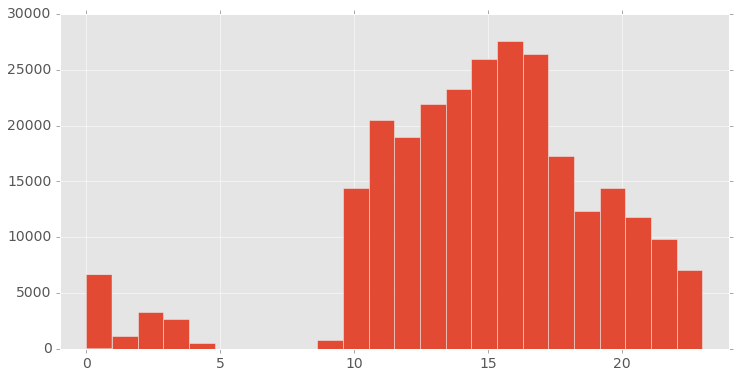

In [294]:
plt.figure(figsize=(12,6))
plt.hist(df.hourOfDay.values, bins=24)
plt.xlim(-1,24);

In [295]:
len(df)

266938

In [33]:
unique_times = df.timestamp.unique()

In [47]:
#unique_hours = 
len(unique_times)

141688

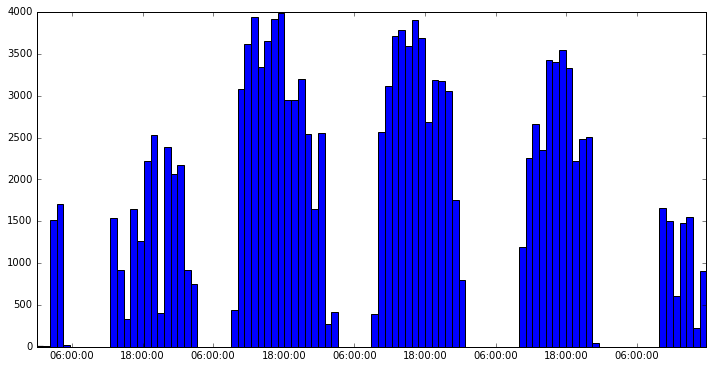

In [40]:
plt.figure(figsize=(12,6))
plt.hist(unique_times, bins=100);

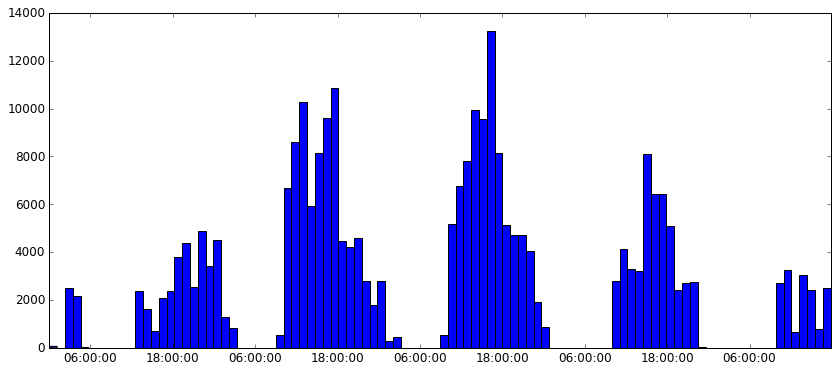

In [162]:
plt.figure(figsize=(14,6))
plt.hist(df.timestamp.values, bins=100);

In [163]:
df.loc[:, ('minuteOfDay', 'AMB_SndMea')].describe()

minuteOfDay     AMB_SndMea
count  266938.000000  266938.000000
mean     1518.969401     462.314937
std       470.804229     140.182836
min         0.000000     118.570000
25%      1253.000000     508.330000
50%      1544.000000     509.590000
75%      1819.000000     510.930000
max      2359.000000     955.010000

In [164]:
#plt.figure(figsize=(14,6))
#plt.plot(df.minuteOfDay, df.AMB_SndMea, 'o')
#plt.xlim(-5,2400);

In [165]:
#plt.figure(figsize=(14,6))
#plt.plot(df.minuteOfDay, df.AMB_SndMax, 'o')
#plt.xlim(-5,2400);

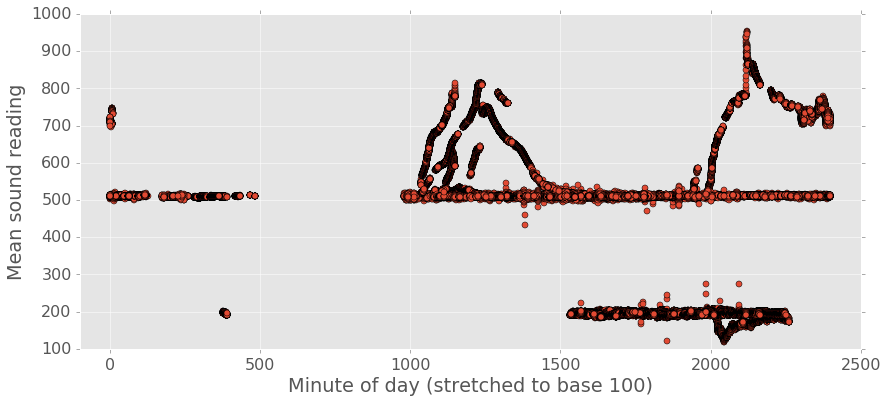

In [300]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(14,6))
plt.plot(df.minuteStretched, df.AMB_SndMea, 'o')
plt.xlabel('Minute of day (stretched to base 100)')
plt.ylabel('Mean sound reading')
plt.xlim(-100,2500);

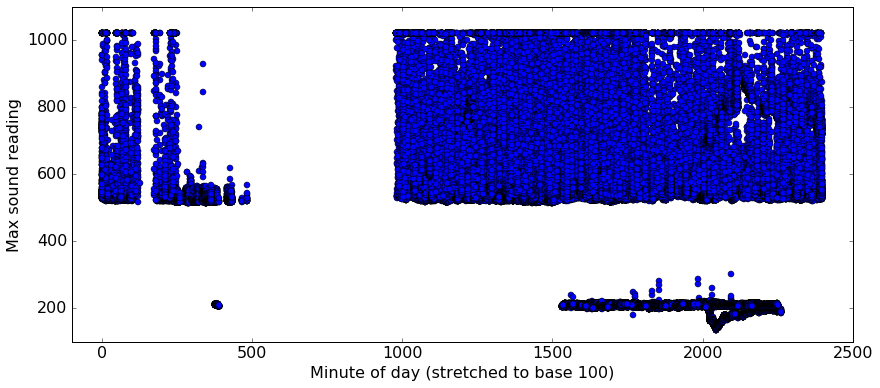

In [167]:
plt.figure(figsize=(14,6))
plt.plot(df.minuteStretched, df.AMB_SndMax, 'o')
plt.xlabel('Minute of day (stretched to base 100)')
plt.ylabel('Max sound reading')
plt.xlim(-100,2500);

In [168]:
print df.sensor.unique()
print len(df.sensor.unique())

['000' '001' '002' '003' '004' '005' '006' '007' '008' '009' '010']
11


In [169]:
df.sensor.value_counts()

009    51839
008    46899
006    34306
007    31859
010    27999
005    24356
003    14876
004    13771
000    12704
002     5149
001     3180
Name: sensor, dtype: int64

In [296]:
print df.columns.tolist()

['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'merge_key', 'day']


In [297]:
# how many days were each sensor active
df.groupby(['day', 'sensor'])['ID'].count()

day  sensor
26   0          8771
     1           298
     2          4722
     3             6
     4          2849
     5          1028
     6          5699
     7           375
     8           724
     9          1173
     10         7820
27   0          3933
     1          1249
     3          8744
     4          2714
     5          2348
     6          9460
     7         14181
     8         15409
     9         17237
     10         9835
28   1           966
     2           427
     3          6126
     4          1050
     5         11570
     6          5824
     7         16372
     8         15070
     9         17829
     10        10129
29   5          9410
     6          5779
     7           931
     8         15696
     9         15600
     10          215
30   1           667
     4          7158
     6          7544
Name: ID, dtype: int64

In [301]:
df['sensor_num'] = df.sensor.astype(int)

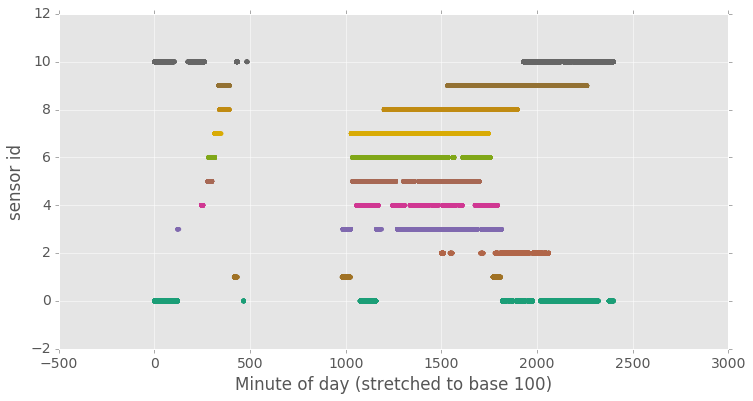

In [302]:
plt.rcParams.update({'font.size': 14})
plt.figure(figsize=(12,6))
plt.scatter(df.minuteStretched, df.sensor_num, c=df.sensor_num, linewidths=0,
            cmap=plt.get_cmap('Dark2', len(df.sensor_num.unique())))
plt.xlabel('Minute of day (stretched to base 100)')
plt.ylabel('sensor id');

In [198]:
print sorted(df.sensor.unique())

['000', '001', '002', '003', '004', '005', '006', '007', '008', '009', '010']


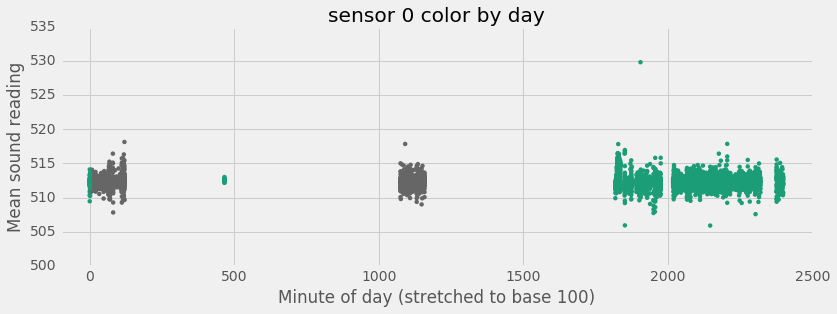

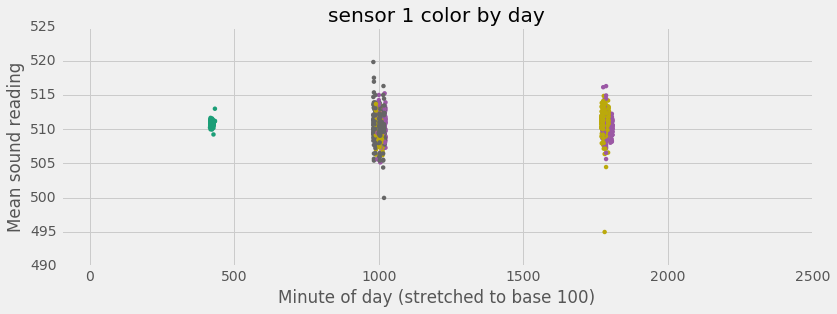

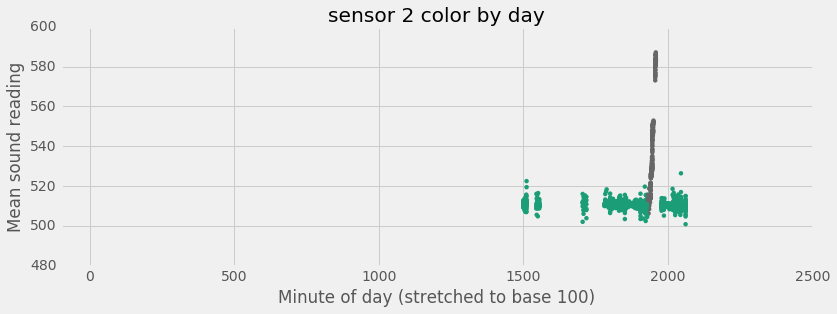

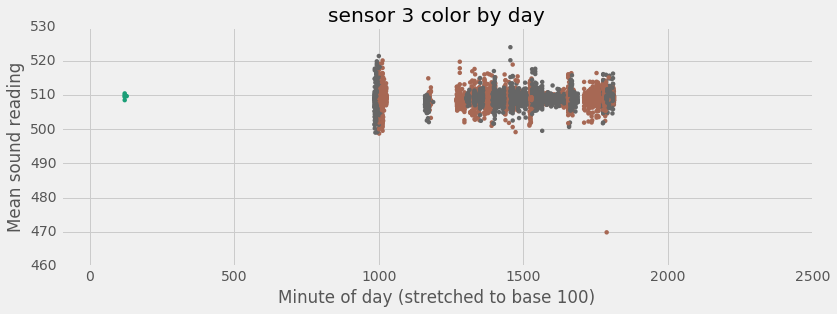

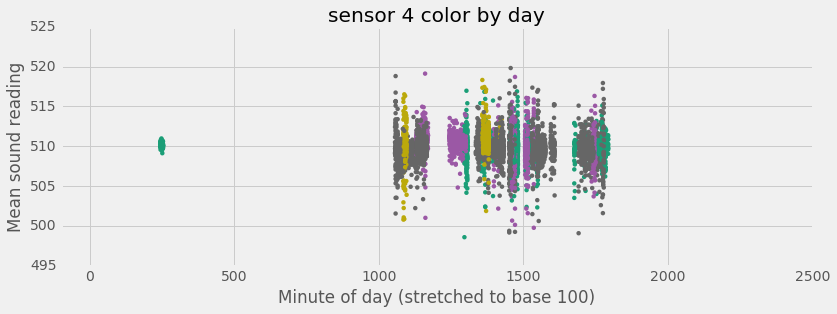

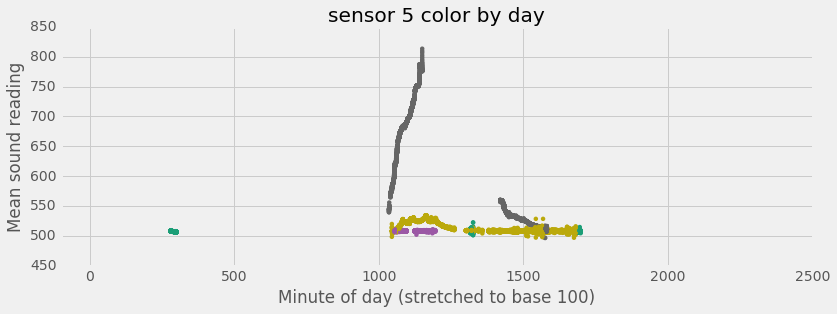

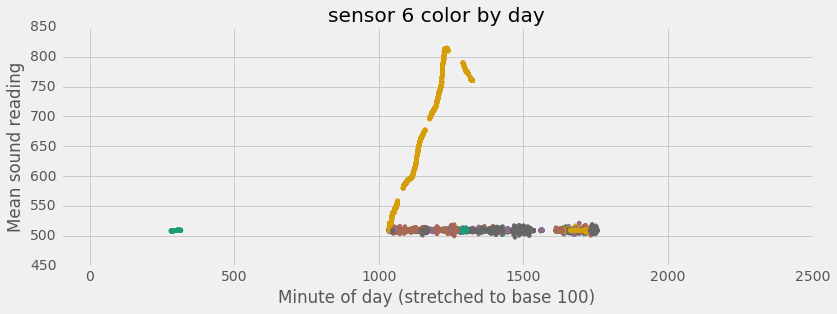

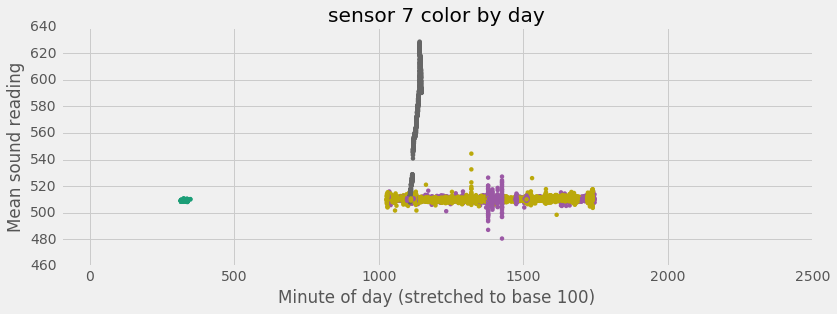

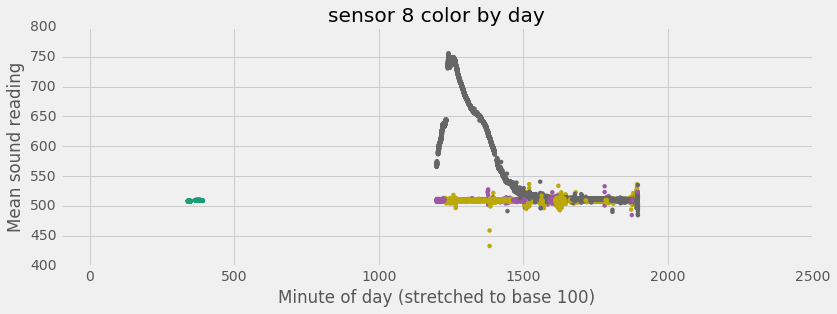

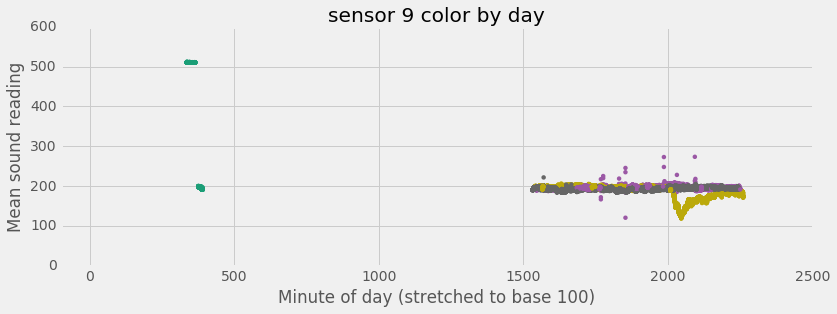

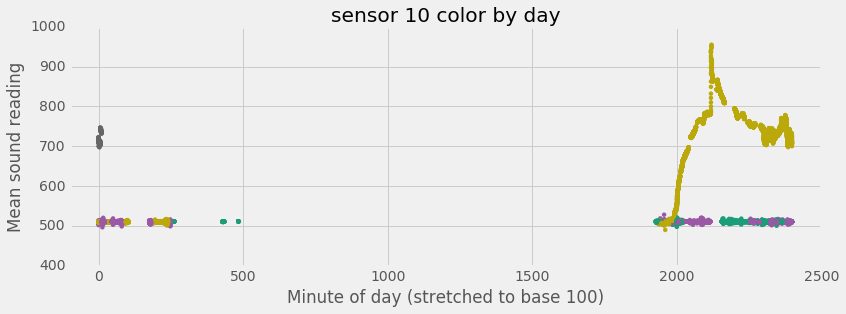

In [466]:
plt.rcParams.update({'font.size': 14})
for i in sorted(df.sensor.unique()):
    plt.figure(figsize=(12,4))
    plt.scatter(df.minuteStretched[df.sensor==i], df.AMB_SndMea[df.sensor==i], linewidths=0, c=df.day[df.sensor==i],
                cmap=plt.get_cmap('Dark2', len(df.day[df.sensor==i].unique())))
    plt.xlabel('Minute of day (stretched to base 100)')
    plt.ylabel('Mean sound reading')
    plt.title('sensor {} color by day'.format(i))
    #plt.ylim(0,1000)
    plt.xlim(-100,2500);

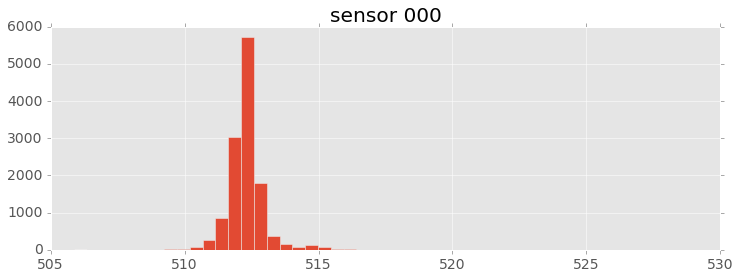

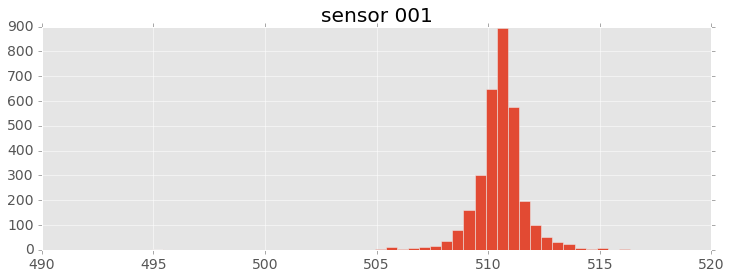

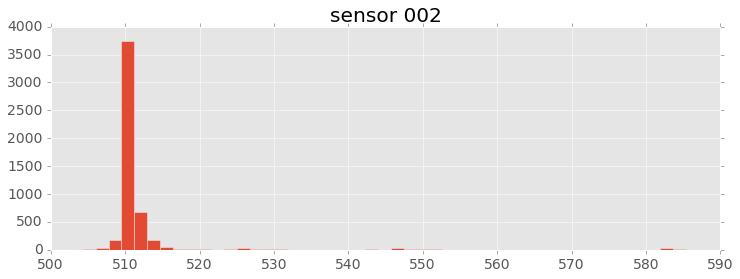

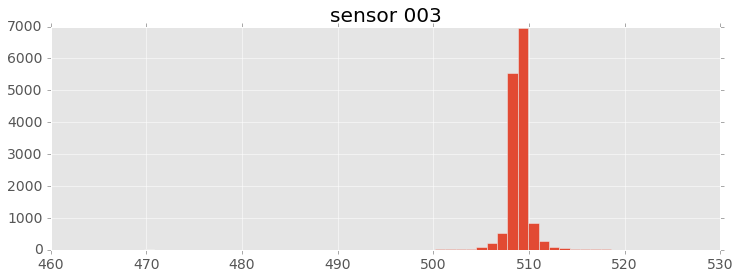

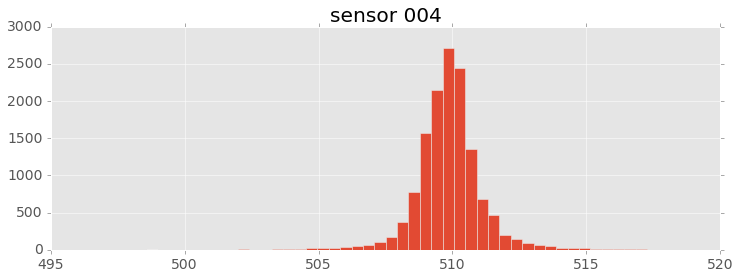

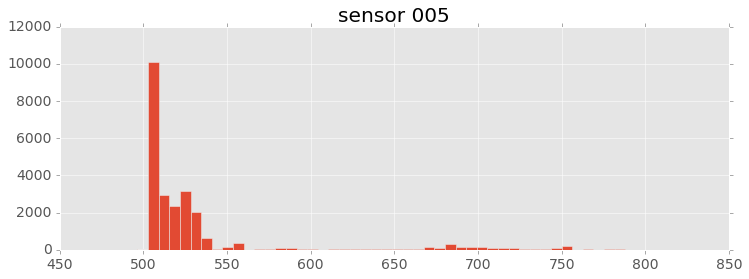

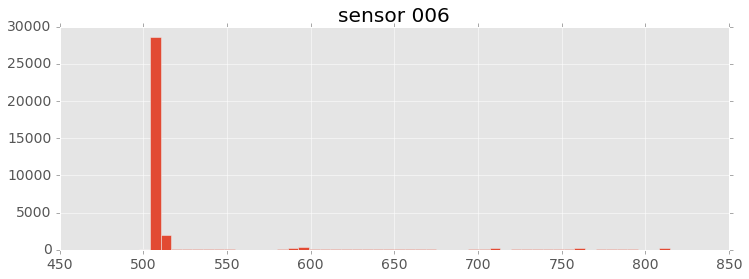

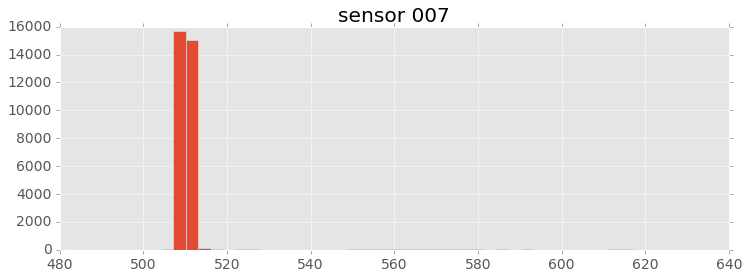

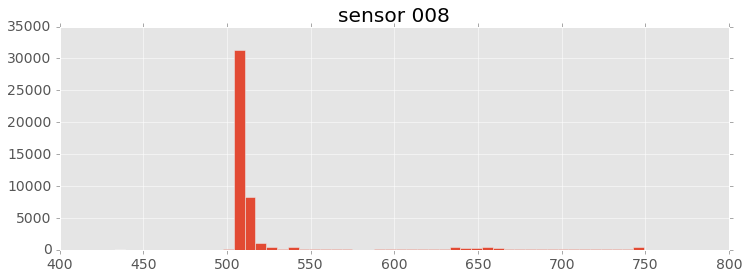

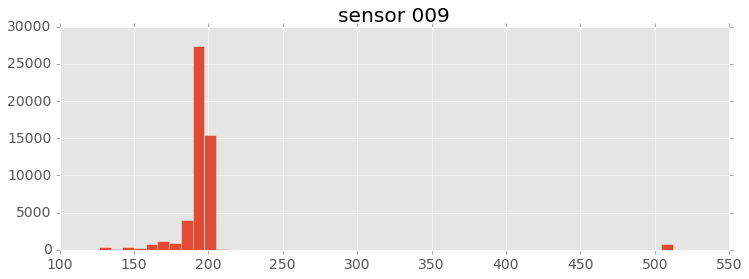

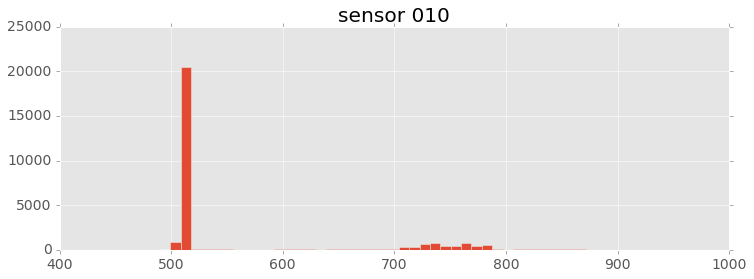

In [205]:
for i in sorted(df.sensor.unique()):
    plt.figure(figsize=(12,4))
    plt.hist(df.AMB_SndMea[df.sensor==i].values, bins=50);
    plt.title('sensor {}'.format(i))

In [210]:
#df.loc[df[df.sensor=='002'].index, ('AMB_SndMea')].std()

idx = df[df.sensor=='002'].index
stdev = df.loc[idx, ('AMB_SndMea')].std()
mean = df.loc[idx, ('AMB_SndMea')].mean()
idxKeep = df.loc[idx, ('AMB_SndMea')].apply(lambda x: True if (x >= mean-stdev*2) & (x <= mean+stdev*2) else False)

In [212]:
len(idx), len(idxKeep), len(idx[idxKeep])

(5149, 5149, 4990)

In [215]:
df.loc[idx[idxKeep],'AMB_SndMea'].head()

126994    509.41
126995    511.05
126996    510.87
126997    510.09
127019    509.12
Name: AMB_SndMea, dtype: float64

In [222]:
for s in df.sensor.unique():
    idx = df[df.sensor==s].index
    stdev = df.loc[idx, ('AMB_SndMea')].std()
    mean = df.loc[idx, ('AMB_SndMea')].mean()
    print 'sensor {} | mean = {} | stdev = {}'.format(s, mean, stdev)

sensor 000 | mean = 512.292108785 | stdev = 0.710509107484
sensor 001 | mean = 510.514327044 | stdev = 1.15243632675
sensor 002 | mean = 512.559615459 | stdev = 9.18281330666
sensor 003 | mean = 508.93408107 | stdev = 1.32497678402
sensor 004 | mean = 509.851964999 | stdev = 1.3098487228
sensor 005 | mean = 533.620380604 | stdev = 54.6447268381
sensor 006 | mean = 525.516926777 | stdev = 54.9009110409
sensor 007 | mean = 511.887190747 | stdev = 11.2374154821
sensor 008 | mean = 526.645474317 | stdev = 48.8451509794
sensor 009 | mean = 197.225140917 | stdev = 39.496066306
sensor 010 | mean = 563.949780706 | stdev = 102.009138792


In [223]:
# ditch everything >2 st devs from each **sensor** mean value
df['keep_SndMean'] = 0
for s in df.sensor.unique():
    idx = df[df.sensor==s].index
    stdev = df.loc[idx, ('AMB_SndMea')].std()
    mean = df.loc[idx, ('AMB_SndMea')].mean()
    idxKeep = df.loc[idx, ('AMB_SndMea')].apply(lambda x: True if (x >= mean-stdev*2) & 
                                                (x <= mean+stdev*2) else False)
    df.loc[idx[idxKeep],'keep_SndMean'] = 1

In [224]:
df.loc[:,('AMB_SndMea', 'keep_SndMean')].head()

AMB_SndMea  keep_SndMean
15      512.86             1
16      510.86             0
17      511.83             1
18      513.27             1
19      511.98             1

In [226]:
df.keep_SndMean.value_counts() / float(df.keep_SndMean.count())

1    0.949603
0    0.050397
Name: keep_SndMean, dtype: float64

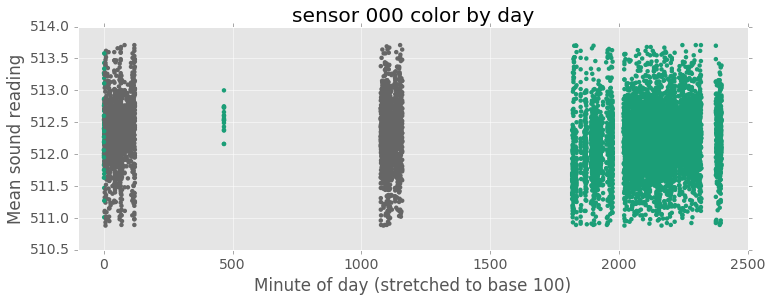

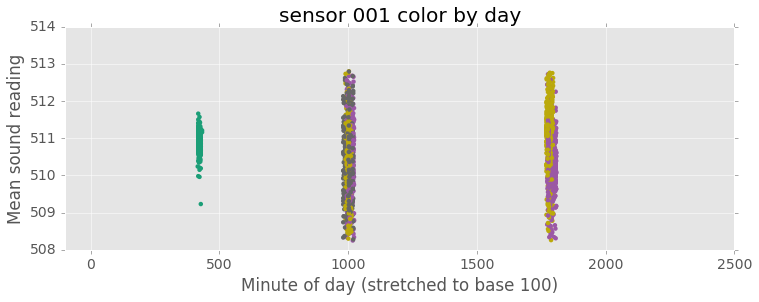

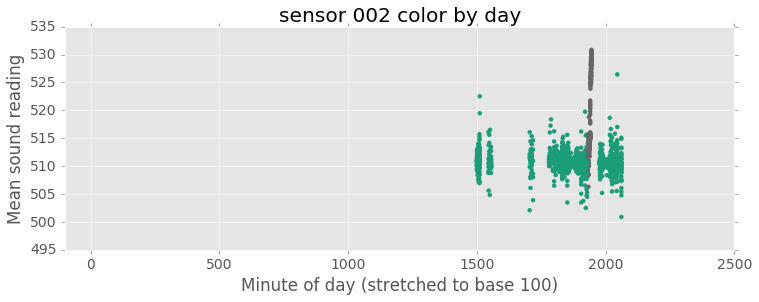

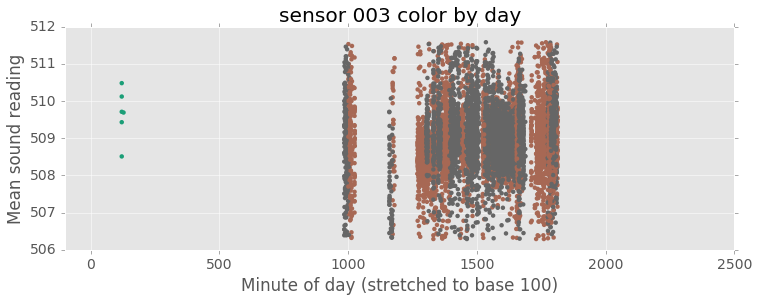

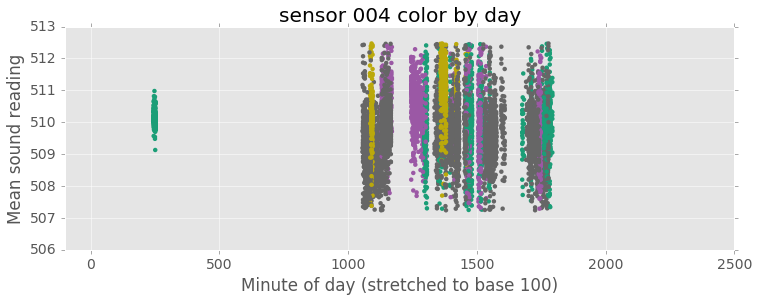

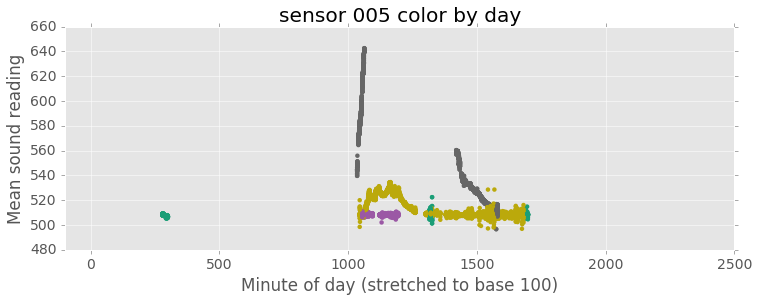

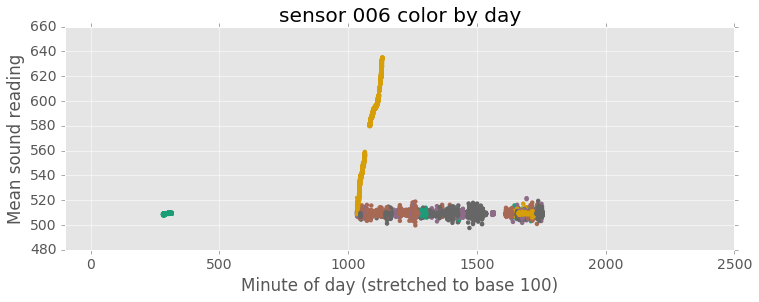

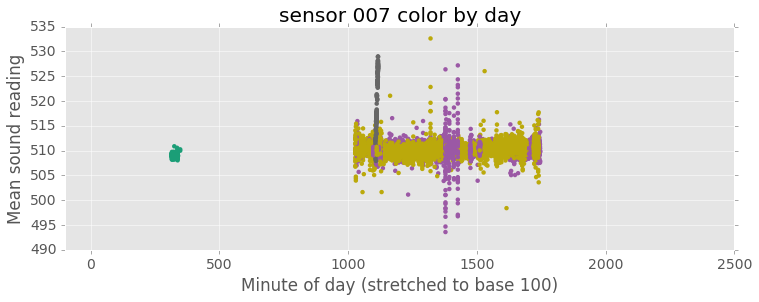

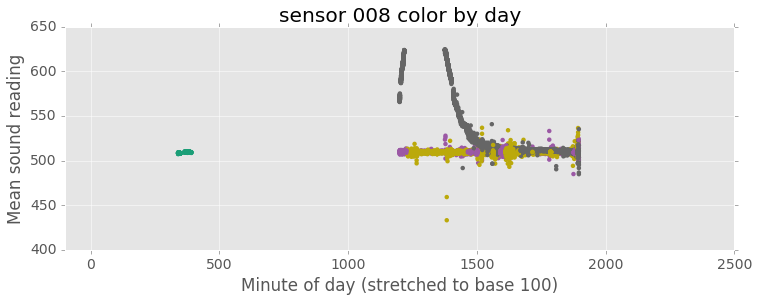

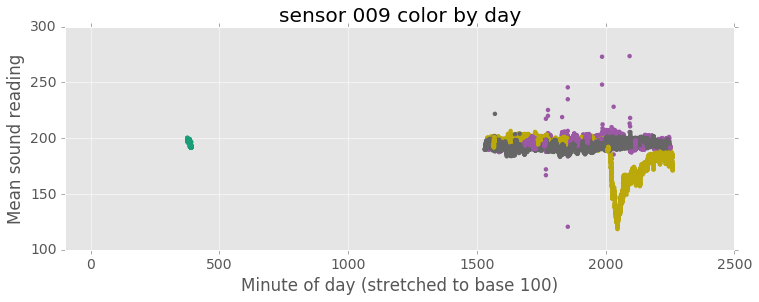

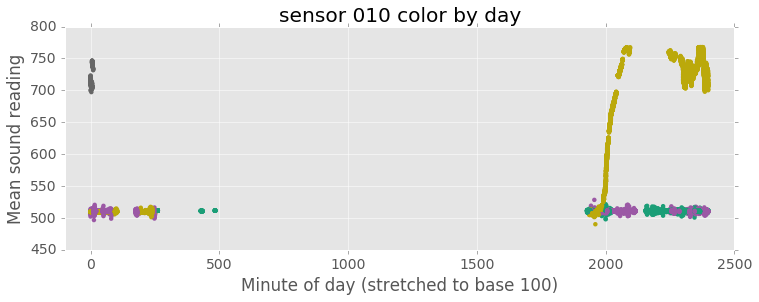

In [227]:
plt.rcParams.update({'font.size': 14})
for i in sorted(df.sensor.unique()):
    plt.figure(figsize=(12,4))
    plt.scatter(df.minuteStretched[(df.sensor==i) & (df.keep_SndMean==1)], 
                df.AMB_SndMea[(df.sensor==i) & (df.keep_SndMean==1)], 
                linewidths=0, c=df.day[(df.sensor==i) & (df.keep_SndMean==1)],
                cmap=plt.get_cmap('Dark2', len(df.day[(df.sensor==i) & (df.keep_SndMean==1)].unique())))
    plt.xlabel('Minute of day (stretched to base 100)')
    plt.ylabel('Mean sound reading')
    plt.title('sensor {} color by day'.format(i))
    #plt.ylim(0,1000)
    plt.xlim(-100,2500);

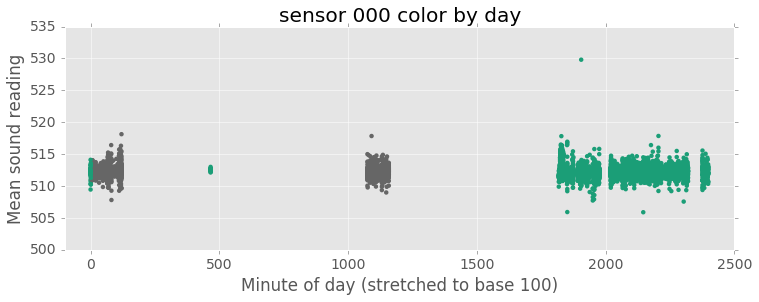

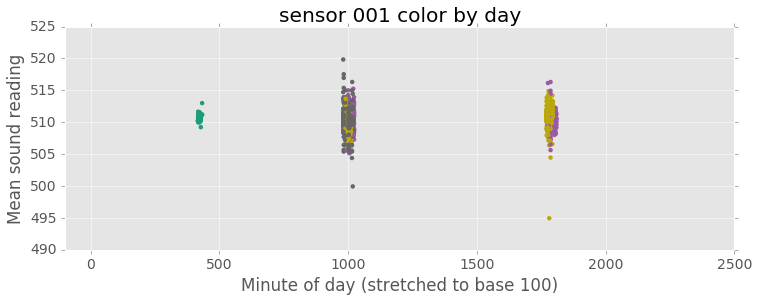

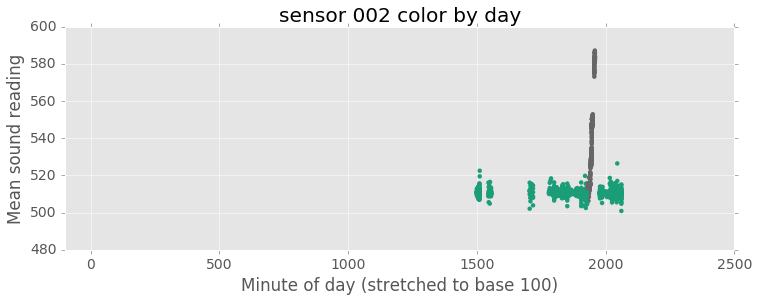

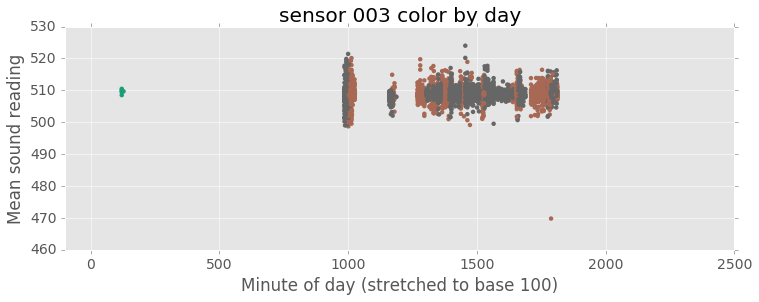

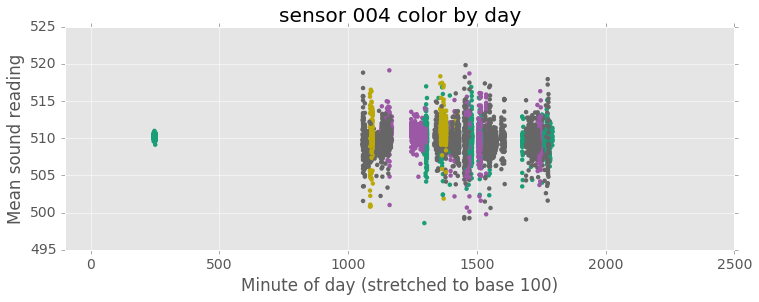

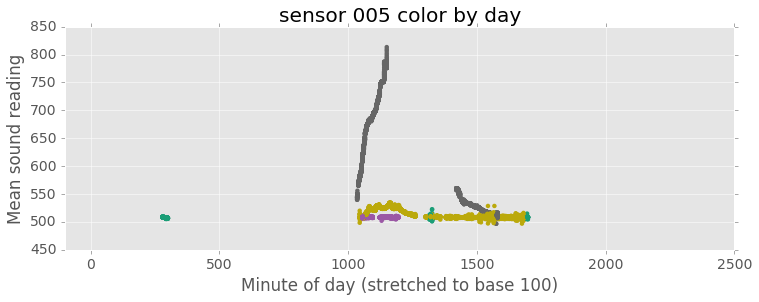

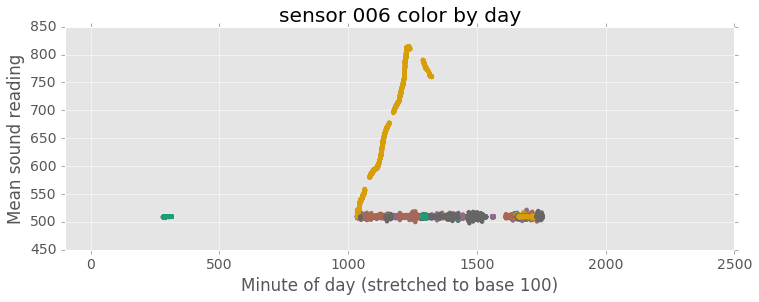

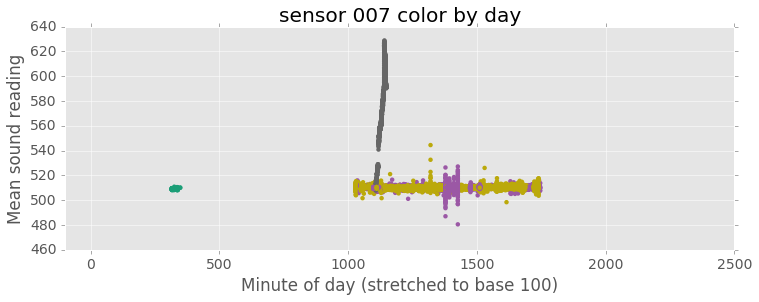

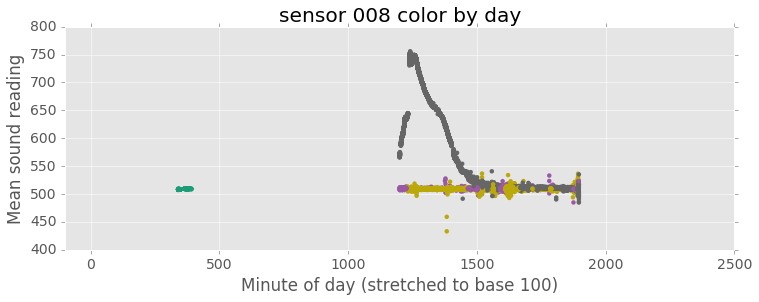

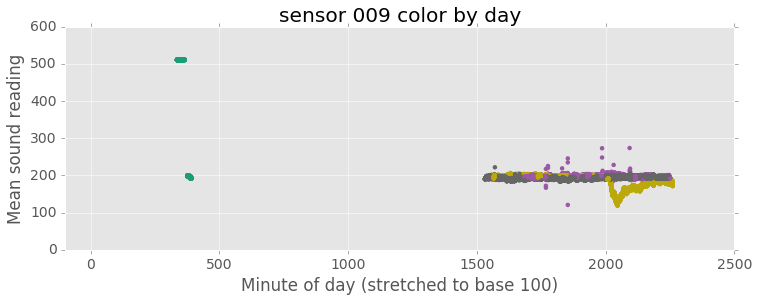

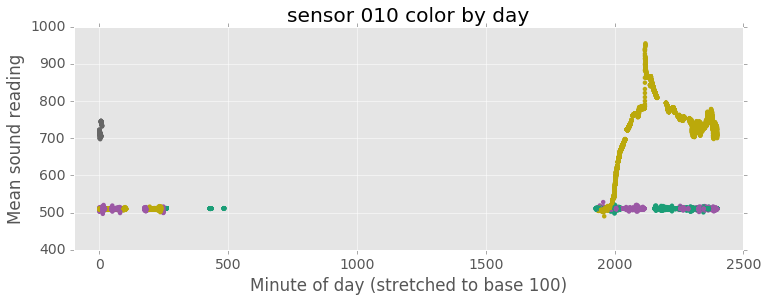

In [231]:
plt.rcParams.update({'font.size': 14})
for i in sorted(df.sensor.unique()):
    plt.figure(figsize=(12,4))
    plt.scatter(df.minuteStretched[df.sensor==i], df.AMB_SndMea[df.sensor==i], linewidths=0, c=df.day[df.sensor==i],
                cmap=plt.get_cmap('Dark2', len(df.day[df.sensor==i].unique())))
    plt.xlabel('Minute of day (stretched to base 100)')
    plt.ylabel('Mean sound reading')
    plt.title('sensor {} color by day'.format(i))
    #plt.ylim(0,1000)
    plt.xlim(-100,2500);

In [234]:
df[df.sensor_num.isin([2, 5, 6, 7, 8, 9, 10])].groupby(['sensor_num','day'])['AMB_SndMea'].\
agg({'median', 'mean', 'max','min'})

max        mean   median     min
sensor_num day                                     
2          26   526.43  510.694970  510.660  500.88
           28   587.13  533.179883  526.160  506.29
5          26   522.45  507.763239  507.645  501.30
           27   510.93  508.184928  508.170  502.07
           28   534.61  513.019784  508.620  496.93
           29   813.27  568.121176  530.970  496.64
6          26   515.73  509.189744  509.220  503.10
           27   521.62  509.342997  509.330  501.76
           28   518.88  509.558302  509.550  499.74
           29   814.61  605.690294  587.070  505.35
           30   519.44  509.036960  509.050  497.61
7          26   510.87  509.026960  509.030  508.04
           27   527.18  510.246535  510.240  480.53
           28   544.46  510.176279  510.110  498.40
           29   628.79  568.116810  566.020  507.42
8          26   510.13  509.078660  509.330  507.20
           27   535.98  509.410528  509.440  484.85
           28   536.68  509.419381  509.370  433.11
           29   755.53  560.914644  515.025  484.72
9          26   512.10  397.679165  510.380  191.36
           27   273.58  196.999506  196.840  120.65
           28   206.45  187.594608  194.820  118.57
           29   221.81  193.408441  193.530  183.39
10         26   521.52  510.782697  510.800  497.87
           27   528.28  510.295643  510.390  496.67
           28   955.01  653.794653  713.830  490.09
           29   746.66  719.374558  712.090  697.31

In [303]:
bad_sensor_days = ['2_28', '5_29', '6_29', '7_29', '8_29', '9_26', '9_28', '10_28', '10_29']

In [305]:
#idx = df.apply(lambda x: True if (str(x.sensor_num) + '_' + str(x.day)).isin(bad_sensor_days) else False, axis=1)
df['sensor_day'] = df.apply(lambda x: str(x.sensor_num) + '_' + str(x.day), axis=1)
idxSD = df.sensor_day.isin(bad_sensor_days)
df[idxSD].head()

ID        GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
9932  134  2015-10-28 19:20:32.984  42.338523 -71.057167      18.03     19.1   
9933  135    2015-10-28 19:20:34.0  42.338436 -71.057167      17.98     19.1   
9934  136    2015-10-28 19:20:36.0  42.338279 -71.057159      16.18     19.1   
9935  137  2015-10-28 19:20:36.984  42.338207 -71.057159      14.96     19.1   
9936  138    2015-10-28 19:20:39.0  42.338111 -71.057159       9.58     19.1   

      GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp     ...      \
9932       9.0      1.0         10.0     15.15     ...       
9933       9.0      1.0         10.0     15.12     ...       
9934       9.0      1.0         10.0     15.07     ...       
9935       9.0      1.0         10.0     15.04     ...       
9936       9.0      1.0         10.0     15.02     ...       

                   timestamp  hourOfDay  minuteOfDay  minuteStretched  \
9932 2015-10-28 19:20:32.984         19         1920           1933.0   
9933 2015-10-28 19:20:34.000         19         1920           1933.0   
9934 2015-10-28 19:20:36.000         19         1920           1933.0   
9935 2015-10-28 19:20:36.984         19         1920           1933.0   
9936 2015-10-28 19:20:39.000         19         1920           1933.0   

       LU05_DESC  LUCODE  merge_key  day  sensor_num  sensor_day  
9932  Commercial    15.0       9932   28           2        2_28  
9933  Commercial    15.0       9933   28           2        2_28  
9934  Commercial    15.0       9934   28           2        2_28  
9935  Commercial    15.0       9935   28           2        2_28  
9936  Commercial    15.0       9936   28           2        2_28  

[5 rows x 39 columns]

In [306]:
df.loc[:,('sensor_num', 'day', 'keep_SndMean')].head()

sensor_num  day  keep_SndMean
0           0   26           NaN
1           0   26           NaN
2           0   26           NaN
3           0   26           NaN
4           0   26           NaN

In [307]:
# reset keep sound flag excluding bad sensor_day combinations
df['keep_SndMean'] = 0
for s in df.sensor.unique():
    idx = df[(df.sensor==s) & (~idxSD)].index
    stdev = df.loc[idx, ('AMB_SndMea')].std()
    mean = df.loc[idx, ('AMB_SndMea')].mean()
    idxKeep = df.loc[idx, ('AMB_SndMea')].apply(lambda x: True if (x >= mean-stdev*2) & 
                                                (x <= mean+stdev*2) else False)
    df.loc[idx[idxKeep],'keep_SndMean'] = 1

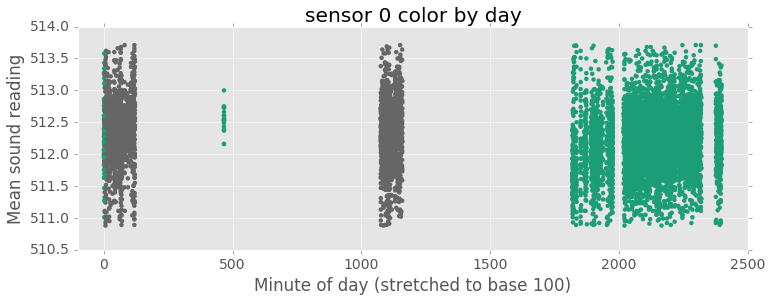

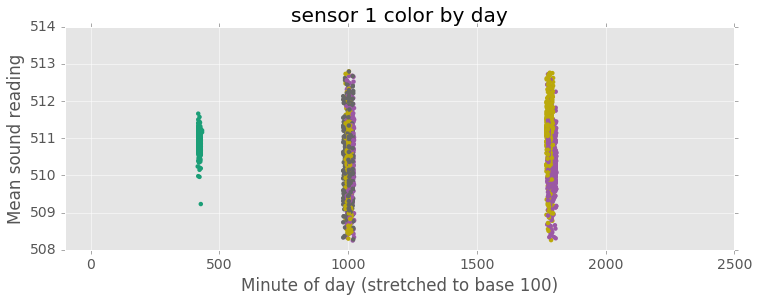

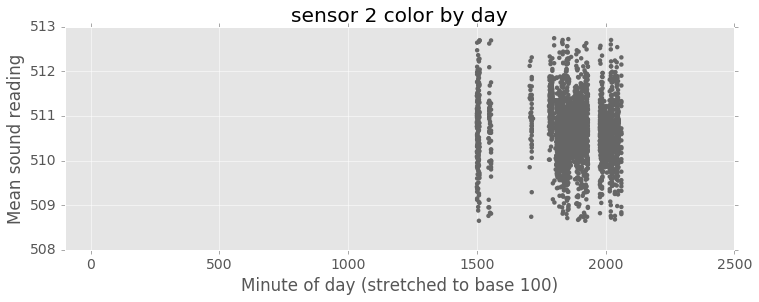

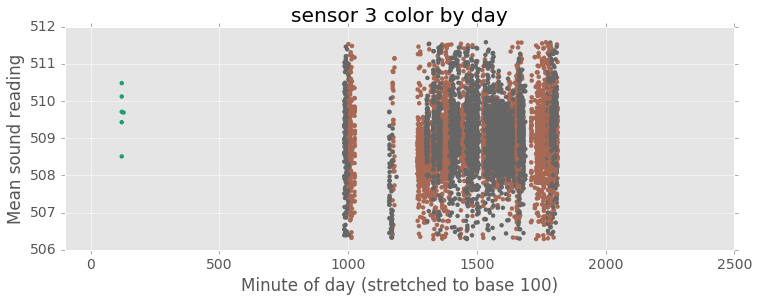

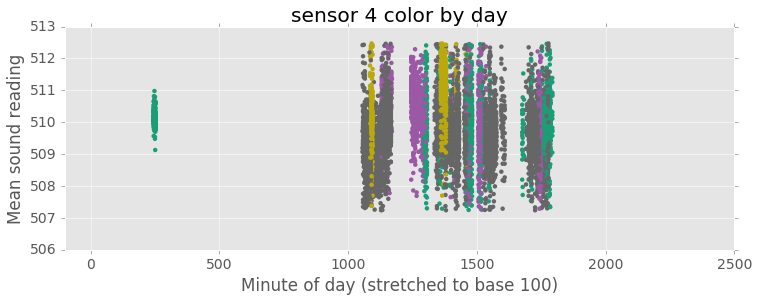

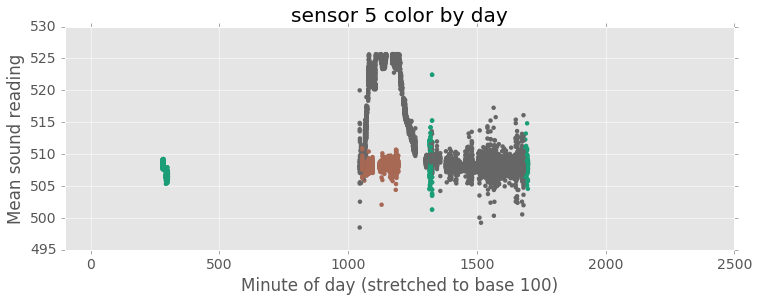

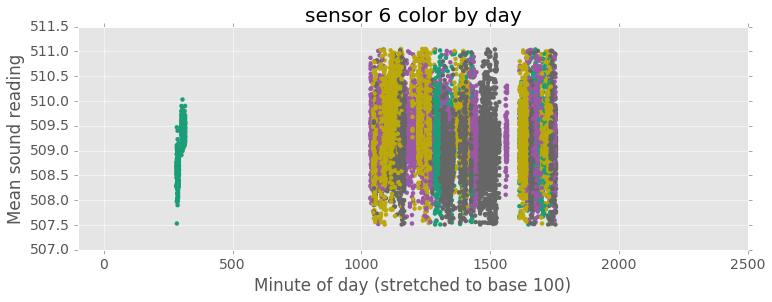

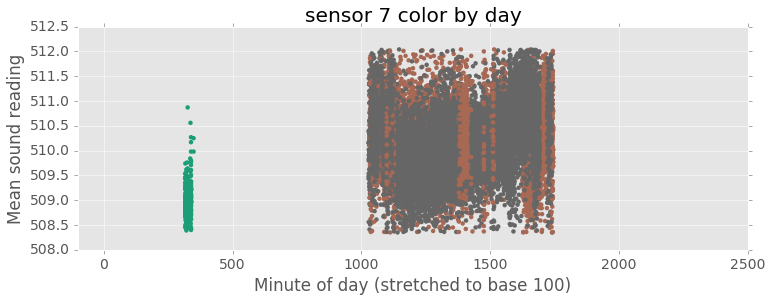

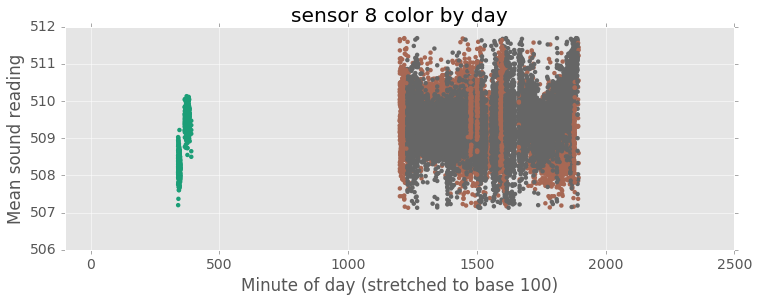

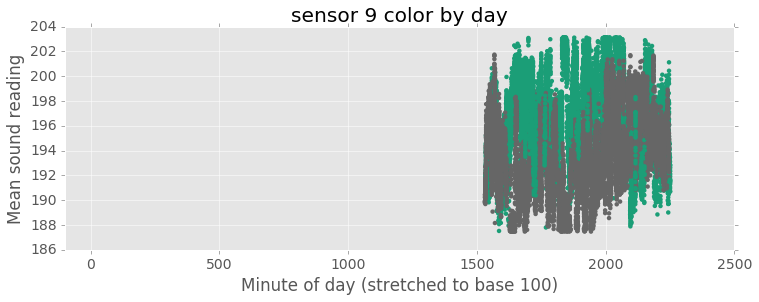

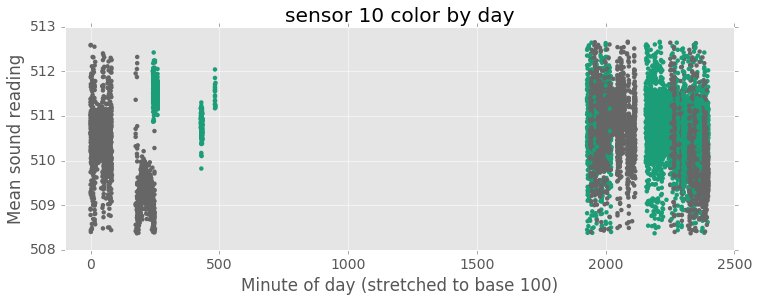

In [308]:
for i in sorted(df.sensor.unique()):
    plt.figure(figsize=(12,4))
    plt.scatter(df.minuteStretched[(df.sensor==i) & (df.keep_SndMean==1)], 
                df.AMB_SndMea[(df.sensor==i) & (df.keep_SndMean==1)], 
                linewidths=0, c=df.day[(df.sensor==i) & (df.keep_SndMean==1)],
                cmap=plt.get_cmap('Dark2', len(df.day[(df.sensor==i) & (df.keep_SndMean==1)].unique())))
    plt.xlabel('Minute of day (stretched to base 100)')
    plt.ylabel('Mean sound reading')
    plt.title('sensor {} color by day'.format(i))
    #plt.ylim(0,1000)
    plt.xlim(-100,2500);

In [265]:
# testing
pctile90 = np.percentile(df.AMB_SndMea, 90)
isLoud = df.AMB_SndMea.apply(lambda x: x > pctile90)
print pctile90
print len(df.AMB_SndMea), len(df[isLoud])

 521.293
266938 26694


In [309]:
# set "is loud" flag
df['is_loud'] = 0
for s in df.sensor.unique():
    idx = df[(df.sensor==s) & (df.keep_SndMean==1)].index
    pctile90 = np.percentile(df.loc[idx, ('AMB_SndMea')], 90)
    idxLoud = df.loc[idx, ('AMB_SndMea')].apply(lambda x: True if x > pctile90 else False)
    df.loc[idx[idxLoud],'is_loud'] = 1

In [320]:

df['is_light'] = 0

for s in df.sensor.unique():
    for h in df[df.sensor==s].hourOfDay.unique():
        idx = df[(df.sensor==s) & (df.hourOfDay==h)].index
        
        pctile90 = np.percentile(df.loc[idx, ('AMB_Lux')], 90)
        
        idxLight = df.loc[idx, ('AMB_Lux')].apply(lambda x: True if x > pctile90 else False)
        
        df.loc[idx[idxLight],'is_light'] = 1

In [319]:
print pctile90, s, h

348.3 10 4


In [317]:
df.head()

ID    GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
0  29309  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
1  29311  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
2  29313  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
3  29315  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   
4  29317  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28     10.0   

   GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp    ...     minuteStretched  \
0       8.0      1.0         10.0      8.80    ...                 0.0   
1       8.0      1.0         10.0      8.79    ...                 0.0   
2       8.0      1.0         10.0      8.80    ...                 0.0   
3       8.0      1.0         10.0      8.79    ...                 0.0   
4       8.0      1.0         10.0      8.79    ...                 0.0   

    LU05_DESC  LUCODE  merge_key  day  sensor_num  sensor_day  keep_SndMean  \
0  Commercial    15.0          0   26           0        0_26             1   
1  Commercial    15.0          1   26           0        0_26             0   
2  Commercial    15.0          2   26           0        0_26             1   
3  Commercial    15.0          3   26           0        0_26             1   
4  Commercial    15.0          4   26           0        0_26             1   

   is_loud  is_light  
0        1         0  
1        0         0  
2        0         0  
3        1         0  
4        0         1  

[5 rows x 42 columns]

In [310]:
df[df.is_loud==1].AMB_SndMea.describe()

count    19479.000000
mean       462.441830
std        114.063493
min        199.640000
25%        510.120000
50%        511.010000
75%        511.590000
max        525.690000
Name: AMB_SndMea, dtype: float64

In [311]:
df[df.is_loud==0].AMB_SndMea.describe()

count    247459.000000
mean        462.304948
std         142.035257
min         118.570000
25%         508.250000
50%         509.500000
75%         510.770000
max         955.010000
Name: AMB_SndMea, dtype: float64

In [312]:
len(df.ID.unique()), len(df)

(31083, 266938)

In [313]:
print df.columns.tolist()

['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'merge_key', 'day', 'sensor_num', 'sensor_day', 'keep_SndMean', 'is_loud']


In [314]:
keepers = ['merge_key', 'sensor', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'AMB_Lux', 
           'timestamp', 'day', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'is_loud']
df[df.keep_SndMean==1].loc[:, keepers].head()

merge_key  sensor    GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  \
0          0       0  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28   
2          2       0  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28   
3          3       0  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28   
4          4       0  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28   
5          5       0  2015-10-26 0:0:36.0  42.337547 -71.085525      17.28   

   AMB_Lux           timestamp  day  hourOfDay  minuteOfDay  minuteStretched  \
0      1.0 2015-10-26 00:00:36   26          0            0              0.0   
2  -9998.0 2015-10-26 00:00:36   26          0            0              0.0   
3  -9998.0 2015-10-26 00:00:36   26          0            0              0.0   
4     18.0 2015-10-26 00:00:36   26          0            0              0.0   
5      5.0 2015-10-26 00:00:36   26          0            0              0.0   

    LU05_DESC  LUCODE  is_loud  
0  Commercial    15.0        1  
2  Commercial    15.0        0  
3  Commercial    15.0        1  
4  Commercial    15.0        0  
5  Commercial    15.0        0

In [341]:
data = pd.DataFrame(df[df.keep_SndMean==1])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196680 entries, 0 to 266563
Data columns (total 42 columns):
ID                   196680 non-null int64
GPS_DATETIMESTAMP    196680 non-null object
GPS_LAT              196680 non-null float64
GPS_LON              196680 non-null float64
GPS_Speed            196680 non-null float64
GPS_Alt              196680 non-null float64
GPS_Sats             196680 non-null float64
GPS_Fix              196680 non-null float64
GPS_Quality          196680 non-null float64
AMB_Temp             196680 non-null float64
AMB_Humd             196680 non-null float64
AMB_Lux              196680 non-null float64
AMB_Snd              196680 non-null float64
AMB_SndMin           196680 non-null float64
AMB_SndMax           196680 non-null float64
AMB_SndMea           196680 non-null float64
RDQ_AcX              196680 non-null float64
RDQ_AcXMin           196680 non-null float64
RDQ_AcXMax           196680 non-null float64
RDQ_AcXMea           196680 non-null 

In [342]:
shadows = pd.read_pickle('../data/shadow.pickle')
shadows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170497 entries, 0 to 170496
Data columns (total 2 columns):
merge_key    170497 non-null int64
is_dark      170497 non-null int64
dtypes: int64(2)
memory usage: 3.9 MB


In [343]:
data = pd.merge(data, shadows, how='left', left_on='merge_key', right_on='merge_key')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196680 entries, 0 to 196679
Data columns (total 43 columns):
ID                   196680 non-null int64
GPS_DATETIMESTAMP    196680 non-null object
GPS_LAT              196680 non-null float64
GPS_LON              196680 non-null float64
GPS_Speed            196680 non-null float64
GPS_Alt              196680 non-null float64
GPS_Sats             196680 non-null float64
GPS_Fix              196680 non-null float64
GPS_Quality          196680 non-null float64
AMB_Temp             196680 non-null float64
AMB_Humd             196680 non-null float64
AMB_Lux              196680 non-null float64
AMB_Snd              196680 non-null float64
AMB_SndMin           196680 non-null float64
AMB_SndMax           196680 non-null float64
AMB_SndMea           196680 non-null float64
RDQ_AcX              196680 non-null float64
RDQ_AcXMin           196680 non-null float64
RDQ_AcXMax           196680 non-null float64
RDQ_AcXMea           196680 non-null 

In [344]:
bumps = pd.read_pickle('../data/bumps.pkl')
bumps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 501057 entries, 0 to 501056
Data columns (total 8 columns):
ID                   501057 non-null int64
GPS_DATETIMESTAMP    501057 non-null object
GPS_LAT              501057 non-null float64
GPS_LON              501057 non-null float64
sensor               501057 non-null int64
acel                 501057 non-null float64
bumpflag             501057 non-null bool
merge_key            501057 non-null int64
dtypes: bool(1), float64(3), int64(3), object(1)
memory usage: 31.1+ MB


In [345]:
data = pd.merge(data, bumps.loc[:,('acel', 'bumpflag', 'merge_key')], 
                how='left', left_on='merge_key', right_on='merge_key')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196680 entries, 0 to 196679
Data columns (total 45 columns):
ID                   196680 non-null int64
GPS_DATETIMESTAMP    196680 non-null object
GPS_LAT              196680 non-null float64
GPS_LON              196680 non-null float64
GPS_Speed            196680 non-null float64
GPS_Alt              196680 non-null float64
GPS_Sats             196680 non-null float64
GPS_Fix              196680 non-null float64
GPS_Quality          196680 non-null float64
AMB_Temp             196680 non-null float64
AMB_Humd             196680 non-null float64
AMB_Lux              196680 non-null float64
AMB_Snd              196680 non-null float64
AMB_SndMin           196680 non-null float64
AMB_SndMax           196680 non-null float64
AMB_SndMea           196680 non-null float64
RDQ_AcX              196680 non-null float64
RDQ_AcXMin           196680 non-null float64
RDQ_AcXMax           196680 non-null float64
RDQ_AcXMea           196680 non-null 

In [346]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 130864 entries, 5299 to 196413
Data columns (total 45 columns):
ID                   130864 non-null int64
GPS_DATETIMESTAMP    130864 non-null object
GPS_LAT              130864 non-null float64
GPS_LON              130864 non-null float64
GPS_Speed            130864 non-null float64
GPS_Alt              130864 non-null float64
GPS_Sats             130864 non-null float64
GPS_Fix              130864 non-null float64
GPS_Quality          130864 non-null float64
AMB_Temp             130864 non-null float64
AMB_Humd             130864 non-null float64
AMB_Lux              130864 non-null float64
AMB_Snd              130864 non-null float64
AMB_SndMin           130864 non-null float64
AMB_SndMax           130864 non-null float64
AMB_SndMea           130864 non-null float64
RDQ_AcX              130864 non-null float64
RDQ_AcXMin           130864 non-null float64
RDQ_AcXMax           130864 non-null float64
RDQ_AcXMea           130864 non-nu

In [347]:
unique_locs = pd.DataFrame(data.groupby(['GPS_LAT', 'GPS_LON'])['merge_key'].count())
unique_locs.rename(columns={'merge_key': 'record_count'}, inplace=True)
unique_locs.reset_index(inplace=True)
unique_locs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38399 entries, 0 to 38398
Data columns (total 3 columns):
GPS_LAT         38399 non-null float64
GPS_LON         38399 non-null float64
record_count    38399 non-null int64
dtypes: float64(2), int64(1)
memory usage: 900.0 KB


In [348]:
unique_locs['lookup'] = unique_locs.GPS_LAT.astype(str) + '|' + unique_locs.GPS_LON.astype(str)

In [349]:
unique_locs.head()

GPS_LAT    GPS_LON  record_count                lookup
0  42.285854 -71.078056             1  42.285854|-71.078056
1  42.286010 -71.078155             1   42.28601|-71.078155
2  42.286090 -71.078216             1   42.28609|-71.078216
3  42.286125 -71.078247             1  42.286125|-71.078247
4  42.286220 -71.077674             1   42.28622|-71.077674

In [334]:
#unique_locs.to_csv('../data/unique_locations_0423.csv', index=False, index_label=False)

In [335]:
print data.LU05_DESC.unique()

['Commercial' 'Multi-Family Residential' 'Industrial'
 'High Density Residential']


In [336]:
lu_match = {'Commercial': 0, 'Multi-Family Residential': 1, 'Industrial': 2, 'High Density Residential': 3}

In [350]:
Y = data.LU05_DESC.apply(lambda x: lu_match[x]).values
print type(Y)
print np.unique(Y)

<type 'numpy.ndarray'>
[0 1 2 3]


In [360]:
data['latlon_match'] = data.GPS_LAT.astype(str) + '|' + data.GPS_LON.astype(str)
data.drop('is_light', axis=1, inplace=True)
print data.columns.tolist()

['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'merge_key', 'day', 'sensor_num', 'sensor_day', 'keep_SndMean', 'is_loud', 'is_dark', 'acel', 'bumpflag', 'latlon_match']


In [412]:
#data.info()
print data.columns.tolist()[9], data.columns.tolist()[10], \
data.columns.tolist()[11], data.columns.tolist()[15], data.columns.tolist()[42]

AMB_Temp AMB_Humd AMB_Lux AMB_SndMea acel


In [380]:
data.loc[:,'minuteOfDay'].head()

5299    1045
5300    1045
5301    1045
5302    1045
5303    1045
Name: minuteOfDay, dtype: int64

In [361]:
data.head()

ID      GPS_DATETIMESTAMP    GPS_LAT    GPS_LON  GPS_Speed  GPS_Alt  \
5299  2127  2015-10-27 10:45:16.0  42.343441 -71.063812      12.69      0.4   
5300  2129  2015-10-27 10:45:16.0  42.343441 -71.063812      12.69      0.4   
5301  2131  2015-10-27 10:45:16.0  42.343441 -71.063812      12.69      0.4   
5302  2133  2015-10-27 10:45:16.0  42.343441 -71.063812      12.69      0.4   
5303  2135  2015-10-27 10:45:16.0  42.343441 -71.063812      12.69      0.4   

      GPS_Sats  GPS_Fix  GPS_Quality  AMB_Temp          ...           \
5299      10.0      1.0          1.0      5.12          ...            
5300      10.0      1.0          1.0      5.13          ...            
5301      10.0      1.0          1.0      5.13          ...            
5302      10.0      1.0          1.0      5.15          ...            
5303      10.0      1.0          1.0      5.16          ...            

      merge_key  day  sensor_num  sensor_day  keep_SndMean  is_loud  is_dark  \
5299       5646   27           0        0_27             1        0      0.0   
5300       5647   27           0        0_27             1        0      0.0   
5301       5648   27           0        0_27             1        0      0.0   
5302       5649   27           0        0_27             1        0      0.0   
5303       5650   27           0        0_27             1        0      0.0   

          acel  bumpflag          latlon_match  
5299  9.356640      True  42.343441|-71.063812  
5300  9.539337      True  42.343441|-71.063812  
5301  9.152499     False  42.343441|-71.063812  
5302  9.495579      True  42.343441|-71.063812  
5303  9.181826     False  42.343441|-71.063812  

[5 rows x 45 columns]

In [377]:
data.columns.tolist()[40], data.columns.tolist()[41], data.columns.tolist()[43]

('is_loud', 'is_dark', 'bumpflag')

In [362]:
X_vals = data.values

In [363]:
from sklearn.cross_validation import train_test_split
X_train, X_test_1, y_train, y_test_1 = train_test_split(X_vals, Y, test_size=0.5, random_state=42)

In [364]:
X_valid, X_test, y_valid, y_test = train_test_split(X_test_1, y_test_1, test_size=0.5, random_state=42)

In [365]:
X_valid.shape, X_train.shape, X_test.shape

((32716, 45), (65432, 45), (32716, 45))

In [366]:
np.save('../data/x_train.npy', X_train)
#X_train_df = pd.DataFrame(data=X_train, columns=data.columns)

In [367]:
np.save('../data/y_train.npy', y_train)
np.save('../data/x_test.npy', X_test)
np.save('../data/y_test.npy', y_test)
np.save('../data/x_valid.npy', X_valid)
np.save('../data/y_valid.npy', y_valid)

In [378]:
X_train[:5,[40,41,43]]

array([[0, 1.0, True],
       [0, 1.0, False],
       [0, 1.0, False],
       [0, 1.0, False],
       [0, 1.0, False]], dtype=object)

In [65]:
# load data
X_train = np.load('../data/x_train.npy')
y_train = np.load('../data/y_train.npy')
X_test = np.load('../data/x_test.npy')
y_test = np.load('../data/y_test.npy')
X_valid = np.load('../data/x_valid.npy')
y_valid = np.load('../data/y_valid.npy')

# check shapes of loaded data
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape
print X_valid.shape, y_valid.shape

(65432, 45) (65432,)
(32716, 45) (32716,)
(32716, 45) (32716,)


In [3]:
# decision trees with new data - three binary features (noise, shadow, bump)
from sklearn import tree
# using binary flags
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[:,[40,41,43]], y_train)
y_pred = clf.predict(X_test[:,[40,41,43]])
correct = y_pred==y_test
print 'test accuracy {:.3f}'.format(correct.sum() / float(len(correct))*100)
y_pred = clf.predict(X_valid[:,[40,41,43]])
correct = y_pred==y_valid
print 'validation accuracy {:.3f}'.format(correct.sum() / float(len(correct))*100)
for i in range(4):
    print 'in LU {} there are {} records, {:.2f} of total'.format(i,len(y_test[y_test==i]), 
                                                                  len(y_test[y_test==i])*100./len(y_test))

test accuracy 65.506
validation accuracy 66.004
in LU 0 there are 21417 records, 65.46 of total
in LU 1 there are 9099 records, 27.81 of total
in LU 2 there are 1387 records, 4.24 of total
in LU 3 there are 813 records, 2.49 of total


In [401]:
# export visualization
from sklearn.externals.six import StringIO
with open("binary_3var_tree.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [4]:
depth = range(2,12)
bin_acc = []
for d in depth:
    # set decision tree with this depth
    clf = tree.DecisionTreeClassifier(max_depth=d)
    # train tree
    clf = clf.fit(X_train[:,[40,41,43]], y_train)
    # predict test category
    y_pred = clf.predict(X_test[:,[40,41,43]])
    # check whihc were correct
    correct = y_pred==y_test
    # add accuracy to array
    bin_acc.append(correct.sum() / float(len(correct))*100)

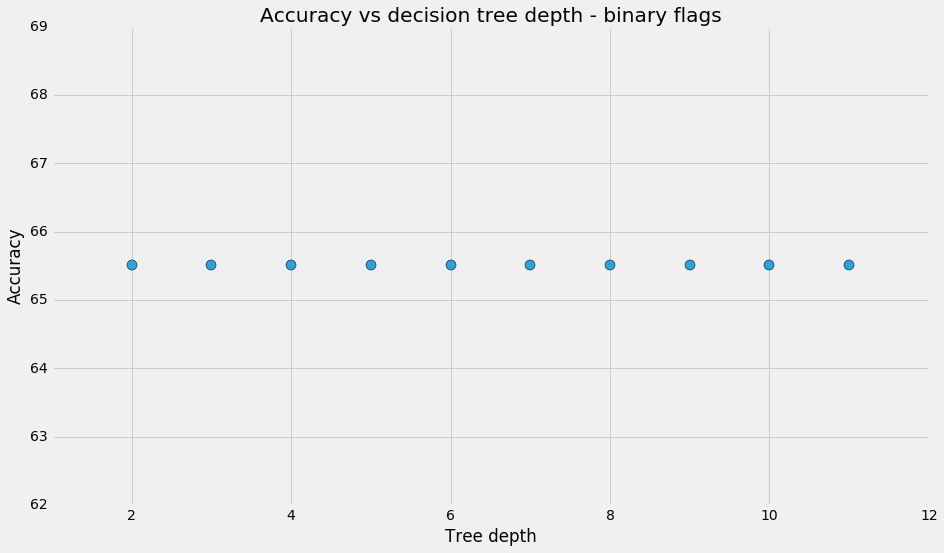

In [5]:
plt.figure(figsize=(14,8))
plt.plot(depth, bin_acc, 'o', markersize=10)
plt.xlim(1,12)
plt.title('Accuracy vs decision tree depth - binary flags')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy');

> conceptually I now think it may make more sense to use actual values instead of arbitrary flags of "is noise" etc

In [6]:
# using observation values for same three features (noise, shadow, acel)
# continuous variables - unlimited tree depth
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train[:,[11,15,42]], y_train)
y_pred = clf.predict(X_test[:,[11,15,42]])
correct = y_pred==y_test
print 'test accuracy {:.3f}'.format(correct.sum() / float(len(correct))*100)
y_pred = clf.predict(X_valid[:,[11,15,42]])
correct = y_pred==y_valid
print 'validation accuracy {:.3f}'.format(correct.sum() / float(len(correct))*100)

test accuracy 75.856
validation accuracy 75.318


In [7]:
print clf.feature_importances_

[ 0.37429315  0.27993687  0.34576998]


In [8]:
# check iterative validation score
from sklearn.cross_validation import cross_val_score
cross_val_score(clf, X_valid[:,[11,15,42]], y_valid, cv=10)

array([ 0.74793767,  0.73785518,  0.74702108,  0.75343721,  0.75213936,
        0.74931214,  0.74472638,  0.76031795,  0.75168196,  0.75894769])

In [411]:
# export visualization
with open("obs_3var_tree_depth5.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

In [9]:
# and different depths
depth = range(2,12)
cont_acc = []
for d in depth:
    # set decision tree with this depth
    clf = tree.DecisionTreeClassifier(max_depth=d)
    # train tree
    clf = clf.fit(X_train[:,[11,15,42]], y_train)
    # predict test category
    y_pred = clf.predict(X_test[:,[11,15,42]])
    # check whihc were correct
    correct = y_pred==y_test
    # add accuracy to array
    cont_acc.append(correct.sum() / float(len(correct))*100)

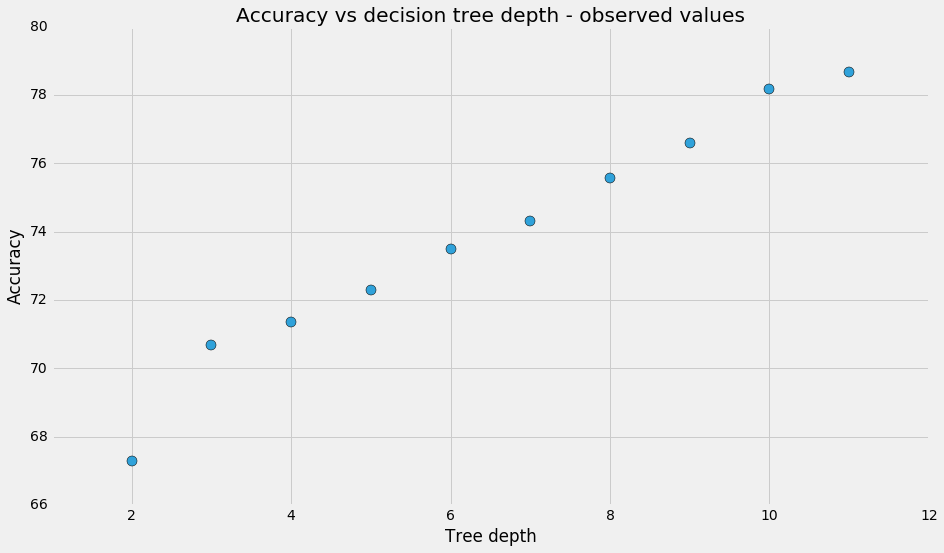

In [10]:
plt.figure(figsize=(14,8))
plt.plot(depth, cont_acc, 'o', markersize=10)
plt.xlim(1,12)
plt.title('Accuracy vs decision tree depth - observed values')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy');

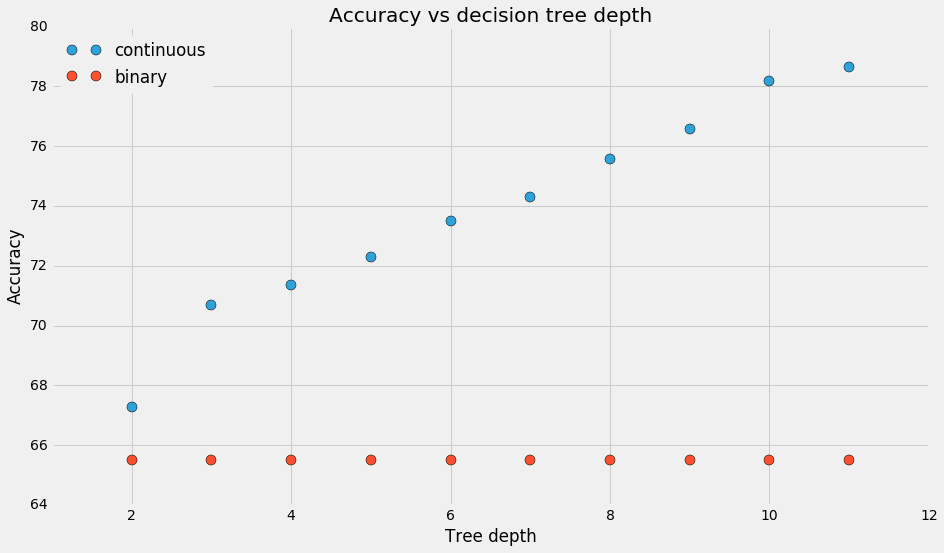

In [11]:
plt.figure(figsize=(14,8))
plt.plot(depth, cont_acc, 'o', markersize=10, label='continuous')
plt.plot(depth, bin_acc, 'o', markersize=10, label='binary')
plt.xlim(1,12)
plt.title('Accuracy vs decision tree depth')
plt.xlabel('Tree depth')
plt.ylabel('Accuracy')
plt.legend(loc='best');

In [12]:
# and adding in temp/humidity for the F of it
#depth = range(2,12)
#acc = []
#for d in depth:
#    print 'depth is',d
#    clf = tree.DecisionTreeClassifier(max_depth=d)
#    clf = clf.fit(X_train[:,[9,10,11,15,42]], y_train)
#    y_pred = clf.predict(X_test[:,[9,10,11,15,42]])
#    correct = y_pred==y_test
#    acc.append(correct.sum() / float(len(correct))*100)
#    print 'test accuracy {:.3f}'.format(correct.sum() / float(len(correct))*100)
#    y_pred = clf.predict(X_valid[:,[9,10,11,15,42]])
#    correct = y_pred==y_valid
#    print 'validation accuracy {:.3f}'.format(correct.sum() / float(len(correct))*100)

In [14]:
col_names = ['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 
             'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 
             'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 
             'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 
             'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'merge_key', 'day', 
             'sensor_num', 'sensor_day', 'keep_SndMean', 'is_loud', 'is_dark', 'acel', 'bumpflag', 'latlon_match']

In [15]:
# create dictionary of column names to column number lookup
col_match = dict(zip(col_names, range(len(col_names))))
print col_match['AMB_Lux'], col_match['AMB_SndMea'], col_match['acel']

11 15 42


In [23]:
# set tree depth and columns for analysis
d = 3
#c = ['is_dark', 'is_loud', 'bumpflag'] # binary indicators
c = ['AMB_Lux', 'AMB_SndMea', 'acel'] # continuous indicators
cols = [col_match[x] for x in c]

# initialize decision tree
clf = tree.DecisionTreeClassifier(max_depth=d)

# fit tree using training data
clf = clf.fit(X_train[:,cols], y_train)
y_pred = clf.predict(X_test[:,cols])
correct = y_pred==y_test

# report results
print 'test set accuracy for tree depth {} is {:.3f}'.format(d, correct.sum() / float(len(correct))*100)
print 'cross validation on validation set:', cross_val_score(clf, X_valid[:,cols], y_valid, cv=5)
print 'feature importances'
print c
print clf.feature_importances_

test set accuracy for tree depth 3 is 65.506
cross validation on validation set: [ 0.65968826  0.66075795  0.65984108  0.65994192  0.66075524]
feature importances
['is_dark', 'is_loud', 'bumpflag']
[ 0.17874267  0.49595903  0.3252983 ]


In [17]:
lu_match = {'Commercial': 0, 'Multi-Family Residential': 1, 'Industrial': 2, 'High Density Residential': 3}
print lu_match

{'Multi-Family Residential': 1, 'Industrial': 2, 'Commercial': 0, 'High Density Residential': 3}


In [90]:
for i in range(4):
    print 'train | LU {} has {:,.0f} records, {:.2f}% of total'.format(i,len(y_train[y_train==i]), 
                                                                  len(y_train[y_train==i])*100./len(y_train))
    print 'test  | LU {} has {:,.0f} records, {:.2f}% of total'.format(i,len(y_test[y_test==i]), 
                                                                  len(y_test[y_test==i])*100./len(y_test))
    print 'valid | LU {} has {:,.0f} records, {:.2f}% of total'.format(i,len(y_valid[y_valid==i]), 
                                                                  len(y_valid[y_valid==i])*100./len(y_valid))
    print

train | LU 0 has 42,980 records, 65.69% of total
test  | LU 0 has 21,417 records, 65.46% of total
valid | LU 0 has 21,559 records, 65.90% of total

train | LU 1 has 18,005 records, 27.52% of total
test  | LU 1 has 9,099 records, 27.81% of total
valid | LU 1 has 9,025 records, 27.59% of total

train | LU 2 has 2,778 records, 4.25% of total
test  | LU 2 has 1,387 records, 4.24% of total
valid | LU 2 has 1,324 records, 4.05% of total

train | LU 3 has 1,669 records, 2.55% of total
test  | LU 3 has 813 records, 2.49% of total
valid | LU 3 has 808 records, 2.47% of total



1. test Random Forest classifier
2. run both decision tree and RF on walkscore

### walkscore

In [24]:
ws = pd.read_csv('../data/walkscores3.csv')
ws.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 3 columns):
Unnamed: 0      4398 non-null int64
uniqueLatLon    4398 non-null object
walkscore       4398 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 103.1+ KB


In [25]:
print col_names

['ID', 'GPS_DATETIMESTAMP', 'GPS_LAT', 'GPS_LON', 'GPS_Speed', 'GPS_Alt', 'GPS_Sats', 'GPS_Fix', 'GPS_Quality', 'AMB_Temp', 'AMB_Humd', 'AMB_Lux', 'AMB_Snd', 'AMB_SndMin', 'AMB_SndMax', 'AMB_SndMea', 'RDQ_AcX', 'RDQ_AcXMin', 'RDQ_AcXMax', 'RDQ_AcXMea', 'RDQ_AcY', 'RDQ_AcYMin', 'RDQ_AcYMax', 'RDQ_AcYMea', 'RDQ_AcZ', 'RDQ_AcZMin', 'RDQ_AcZMax', 'RDQ_AcZMea', 'sensor', 'timestamp', 'hourOfDay', 'minuteOfDay', 'minuteStretched', 'LU05_DESC', 'LUCODE', 'merge_key', 'day', 'sensor_num', 'sensor_day', 'keep_SndMean', 'is_loud', 'is_dark', 'acel', 'bumpflag', 'latlon_match']


In [27]:
ws.walkscore.describe()

count    4398.000000
mean       85.228058
std        15.200519
min         9.000000
25%        80.000000
50%        89.000000
75%        97.000000
max       100.000000
Name: walkscore, dtype: float64

In [33]:
len(X_train)

65432

In [35]:
# add a column for walkscore
print X_train.shape
X_train = np.c_[X_train, np.zeros(len(X_train))]
print X_train.shape

(65432, 45)
(65432, 46)


In [57]:
ws.uniqueLatLon[0], X_train[2,44]

('42.256248|-71.126014', '42.353981|-71.057144')

In [63]:
# update walkscore based on latlon matching - this isn't working and not sure why...
np.in1d(X_valid[:,44], ws.uniqueLatLon[0])

array([False, False, False, ..., False, False, False], dtype=bool)

In [66]:
df_train = pd.DataFrame(data=X_train, columns=col_names)

In [81]:
df_train = df_train.merge(ws.loc[:, ('uniqueLatLon', 'walkscore')], how='left',
                          left_on='latlon_match', right_on='uniqueLatLon')
#df_train.info() # hrm only 2,433 matches? I think old dataframe used to query for walkscores...

In [73]:
uniqueLocs2 = pd.read_csv('../data/UniqueLocations.csv')
uniqueLocs2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152033 entries, 0 to 152032
Data columns (total 5 columns):
Unnamed: 0      152033 non-null int64
uniqueLatLon    152033 non-null object
GPS_LAT         152033 non-null float64
GPS_LON         152033 non-null float64
ID              152033 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 5.8+ MB


In [78]:
df_train = df_train.merge(uniqueLocs2.loc[:, ('uniqueLatLon', 'GPS_LAT')], how='left',
                          left_on='latlon_match', right_on='uniqueLatLon')
#df_train.info() # this unique file matches all ~65k training datapoints

### Random Forest classification

In [82]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier as RFC

In [157]:
# set tree depth, number of trees, and columns for analysis
d = 10
n_trees = 5
#c = ['is_dark', 'is_loud', 'bumpflag'] # binary indicators
c = ['AMB_Lux', 'AMB_SndMea', 'acel'] # continuous indicators
cols = [col_match[x] for x in c]

# initialize decision tree
rfc = RFC(n_estimators=n_trees, max_depth=d)

# fit tree using training data
rfc = rfc.fit(X_train[:,cols], y_train)
y_pred = rfc.predict(X_test[:,cols])
correct = y_pred==y_test

# report results, including cross validation
print 'tree depth {} | number of trees {}'.format(d, n_trees)
print 'test set accuracy for is {:.3f}'.format(correct.sum() / float(len(correct))*100)
print 'cross validation on validation set: {}'.format(', '.join([
        str(np.round(v, 5)) for v in cross_val_score(rfc, X_valid[:,cols], y_valid, cv=5)]))
print 'feature importances'
print c
print rfc.feature_importances_

tree depth 10 | number of trees 5
test set accuracy for is 78.775
cross validation on validation set: 0.77048, 0.78331, 0.78026, 0.77671, 0.78123
feature importances
['AMB_Lux', 'AMB_SndMea', 'acel']
[ 0.32129988  0.30069322  0.37800691]
